# 🌦🌡 Weather Forecasting 📈 



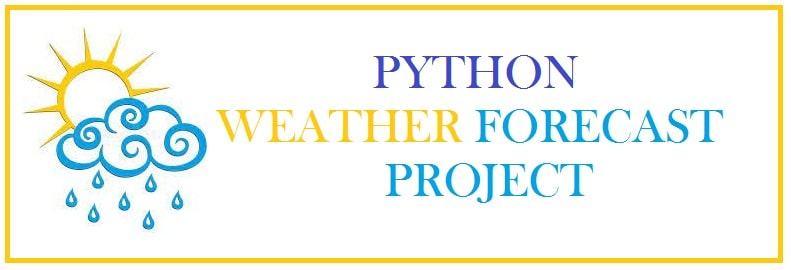

In [1]:
from IPython.display import Image 
Image(filename="Weather.JPG")

##### **About the Dataset**
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. 

### Perform exploratory data analysis (EDA) and time series forecasting on  weather dataset

## Load the Dataset

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


#### Load and Explore the Dataset

In [2]:
df=pd.read_csv(r"temp.csv")


In [3]:
#Setting option to see all the columns.
pd.set_option('display.max_columns', None)

## Basic Overview

In [4]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [5]:
df.shape

(7752, 25)


**Features**
- station - used weather station number: 1 to 25
- Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPSTmaxlapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPSTminlapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  



In [6]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

**Here's what we can conclude from the summary statistics:**

**1.Count:** 
We have a total of 7750 data points for most columns, except for Next_Tmax and Next_Tmin, which have 7725 non-null values. This indicates there are some missing values in these two target variables.

**2.Mean(AVG):**

*Present_Tmax* has an average daily maximum temperature of approximately 29.77°C.

*Present_Tmin* has an average daily minimum temperature of approximately 23.23°C.

*lat and lon* represent the latitude and longitude, respectively.

*DEM (Digital Elevation Model)* has an average value of approximately 126.99.

*Slope* has an average slope value of approximately 61.87.

*Solar radiation* has an average solar radiation value of approximately 1.26.

*Next_Tmax* has an average of approximately 30.27°C.

*Next_Tmin* has an average of approximately 22.93°C.


**3.Standard Deviation (Std):**

The standard deviation provides a measure of the spread or variability in the data.
For example, *Present_Tmax* has a relatively low standard deviation of approximately 2.97, indicating that the daily maximum temperature doesn't vary significantly from day to day.



**4.Min and Max:**

These values represent the minimum and maximum values in each column.
For instance, the minimum value for Present_Tmax is 20°C, while the maximum is 37.6°C.
Similarly, Next_Tmax ranges from 17.4°C to 38.9°C, and Next_Tmin ranges from 11.3°C to 29.8°C.


**Percentiles (25%, 50%, 75%):**

These values provide insight into the data distribution.
For example, the 25th percentile (Q1) for Present_Tmax is 27.8°C, meaning that 25% of the data points have a maximum temperature below this value.
The 50th percentile (Q2) is the median, indicating the middle value of the dataset.
The 75th percentile (Q3) for Present_Tmax is 32.0°C, showing that 75% of the data points have a maximum temperature below this value.








7752 rows , 25 columns

## Drop Columns :

#### The code drops irrelevant columns, simplifying the dataset for weather forecasting.


In [7]:
columns_to_drop = [
    'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
    'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3',
    'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' ,'lat','lon','DEM','Slope' , 'Solar radiation',
    'Next_Tmax','Next_Tmin'
]

df = df.drop(columns=columns_to_drop)


In [8]:
df.head()

station        Date  Present_Tmax  Present_Tmin
0      1.0  30-06-2013          28.7          21.4
1      2.0  30-06-2013          31.9          21.6
2      3.0  30-06-2013          31.6          23.3
3      4.0  30-06-2013          32.0          23.4
4      5.0  30-06-2013          31.4          21.9

In [9]:
df.index

RangeIndex(start=0, stop=7752, step=1)

In [10]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin'], dtype='object')

In [11]:
df.dtypes

station         float64
Date             object
Present_Tmax    float64
Present_Tmin    float64
dtype: object

#### The 'Date' column is currently in the 'object' format, which may need to be converted to a datetime format for time series analysis

In [12]:
#convert the date to datetime
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\marah salahat\AppData\Local\Temp\ipykernel_5900\4137411456.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


#### To check if dates and times are in chronological order:

In [13]:
df.index.is_monotonic

C:\Users\marah salahat\AppData\Local\Temp\ipykernel_5900\2090065119.py:1: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  df.index.is_monotonic


True

Monotonic order means that the values are either consistently increasing or consistently decreasing (but not both).

In [14]:
df.nunique()

station          25
Date            310
Present_Tmax    167
Present_Tmin    155
dtype: int64

### we can draw several conclusions about our weather dataset:

**Station:** There are 25 unique weather stations in the dataset, indicating data from different geographical locations.

**Temperature Features (Present_Tmax and Present_Tmin):** These features have a reasonable number of unique values, indicating variation in temperature data.


**Date:**
* Only 310 dates are recorded but they should be 1796 dates.
* Huge number of missing dates.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       7750 non-null   float64       
 1   Date          7750 non-null   datetime64[ns]
 2   Present_Tmax  7682 non-null   float64       
 3   Present_Tmin  7682 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 242.4 KB


**The DataFrame contains a total of 7,752 entries across 4 columns. However, there are missing values in the dataset. Specifically:**

1. The **'station'** column has 7,750 non-null entries, indicating that there are two missing values in this column.

2. The **'Date'** column has 7,750 non-null entries and is of datetime type, which is suitable for date-time operations.

3. The **'Present_Tmax'** column has 7,682 non-null entries, indicating that there are 70 missing values in this column.

4. The **'Present_Tmin'** column also has 7,682 non-null entries, with 70 missing values.

**Overall, the dataset appears to be relatively complete, with only a small percentage of missing values in the temperature-related columns.**

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

station          2
Date             2
Present_Tmax    70
Present_Tmin    70
dtype: int64


**Columns with Missing Values:**

'Present_Tmax' and 'Present_Tmin' have 70 missing values each.

'Date' and 'Station' have 2 missing values each.



### **missing dates are not null, they are not recorded on the data.**

In [16]:
ratio_of_missing_dates = (1 - (310 / 1796)) * 100
print('Ratio of missing dates: ',f"{ratio_of_missing_dates:.2f}" , '%')

Ratio of missing dates:  82.74 %


In [18]:
start_date = pd.to_datetime('2013-01-07')
end_date = pd.to_datetime('2017-12-08')

date_range = pd.date_range(start_date, end_date)

missing_dates = date_range.difference(df['Date'])

num_missing_dates = len(missing_dates)

print(f"Number of missing dates: {num_missing_dates}")
print("Missing dates:")

for missing_date in missing_dates:
    print(missing_date)


Number of missing dates: 1487
Missing dates:
2013-01-09 00:00:00
2013-01-10 00:00:00
2013-01-11 00:00:00
2013-01-12 00:00:00
2013-01-13 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00:00:00
2013-01-17 00:00:00
2013-01-18 00:00:00
2013-01-19 00:00:00
2013-01-20 00:00:00
2013-01-21 00:00:00
2013-01-22 00:00:00
2013-01-23 00:00:00
2013-01-24 00:00:00
2013-01-25 00:00:00
2013-01-26 00:00:00
2013-01-27 00:00:00
2013-01-28 00:00:00
2013-01-29 00:00:00
2013-01-30 00:00:00
2013-01-31 00:00:00
2013-02-01 00:00:00
2013-02-02 00:00:00
2013-02-03 00:00:00
2013-02-04 00:00:00
2013-02-05 00:00:00
2013-02-06 00:00:00
2013-02-09 00:00:00
2013-02-10 00:00:00
2013-02-11 00:00:00
2013-02-12 00:00:00
2013-02-13 00:00:00
2013-02-14 00:00:00
2013-02-15 00:00:00
2013-02-16 00:00:00
2013-02-17 00:00:00
2013-02-18 00:00:00
2013-02-19 00:00:00
2013-02-20 00:00:00
2013-02-21 00:00:00
2013-02-22 00:00:00
2013-02-23 00:00:00
2013-02-24 00:00:00
2013-02-25 00:00:00
2013-02-26 00:00:00
2013-02-27 00:0

**It appears that missing dates are not represented as null values but are simply not recorded in the data. These missing dates account for a significant portion of the date range, approximately 82.74% of the total period from January 7, 2013, to December 8, 2017. There are a total of 1487 missing dates within this period, which may require further investigation or handling if necessary for analysis or modeling purposes.**

### **Now we want to see if the missing dates are from specific periods or randomly.**

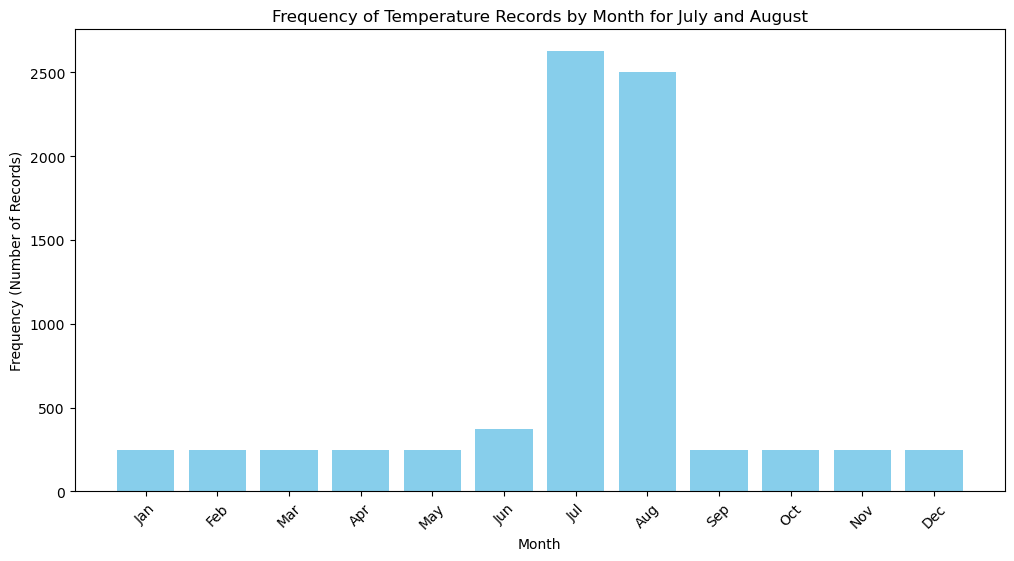

In [26]:
# Calculate the count of records for each month
month_counts = df['Date'].dt.month.value_counts().sort_index()

# Define month names for labeling the x-axis
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Create a bar plot to show the frequency of records for each month
plt.figure(figsize=(12, 6))
plt.bar(month_names, month_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency (Number of Records)')
plt.title('Frequency of Temperature Records by Month for July and August')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()



#### As shown in the plot the recorded months mostly just for July and August,the entire monthst here are a lot of recordes missed from the entire months.

#### Since we have no other choice we will continue working on this data but only for July and August. It will be a prototype model to predict temperatures but for now just for July and August. Because collecting data is not that easy :)

In [27]:
# Filter the DataFrame to keep only July (Month == 7) and August (Month == 8) records
df = df[(df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)]


### Check the missing dates on July and August

In [28]:
years = range(2013, 2019)

for year in years:
    # Create a date range for July and August in the current year
    start_date = pd.Timestamp(f'{year}-07-01')
    end_date = pd.Timestamp(f'{year}-08-31')
    date_range = pd.date_range(start_date, end_date)

    # Get the dates in your DataFrame for July and August in the current year
    dates_in_dataframe = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]['Date']

    # Find missing dates by comparing the date range with the dates in the DataFrame
    missing_dates = date_range[~date_range.isin(dates_in_dataframe)]

    print(f"Missing Dates in July and August {year}:")
    print(missing_dates)
    print()


Missing Dates in July and August 2013:
DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-09', '2013-07-10',
               '2013-07-11', '2013-07-12', '2013-08-01', '2013-08-02',
               '2013-08-03', '2013-08-04', '2013-08-05', '2013-08-06',
               '2013-08-09', '2013-08-10', '2013-08-11', '2013-08-12',
               '2013-08-31'],
              dtype='datetime64[ns]', freq=None)

Missing Dates in July and August 2014:
DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-09', '2014-07-10',
               '2014-07-11', '2014-07-12', '2014-08-01', '2014-08-02',
               '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06',
               '2014-08-09', '2014-08-10', '2014-08-11', '2014-08-12',
               '2014-08-31'],
              dtype='datetime64[ns]', freq=None)

Missing Dates in July and August 2015:
DatetimeIndex

#### The missing dates of July and August are regular for each year, but in 2018 all July and August records are missed, so we will exept this year. As a result, we will train our model to predict temperatures in ranges of : (13-7 t0 30-7) & (13-8 to 30-8)

In [29]:
df = df[df['Date'].dt.year != 2018]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 175 to 7749
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       5125 non-null   float64       
 1   Date          5125 non-null   datetime64[ns]
 2   Present_Tmax  5090 non-null   float64       
 3   Present_Tmin  5090 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 200.2 KB


**After filtering out the records for the year 2018 and focusing on the dates between July 13th to July 30th and August 13th to August 30th for each year, the DataFrame now contains a total of 5,125 entries across 4 columns. The summary of the DataFrame is as follows:**

1. The **'station'** column has 5,125 non-null entries, indicating that there are no missing values in this column.

2. The **'Date'** column has 5,125 non-null entries and is of datetime type, suitable for date-time operations.

3. The **'Present_Tmax'** column has 5,090 non-null entries, suggesting that there are 35 missing values in this column.

4. The **'Present_Tmin'** column also has 5,090 non-null entries, with 35 missing values.


In [31]:
df.head()

station       Date  Present_Tmax  Present_Tmin
175      1.0 2013-07-07          25.9          20.1
176      2.0 2013-07-07          28.5          20.9
177      3.0 2013-07-07          28.5          23.0
178      4.0 2013-07-07          28.7          22.6
179      5.0 2013-07-07          30.8          21.8

## **Now let's go a step back to the missing values**
#### **Impute the missing values:**

In [32]:
lags = 1
# Impute missing values for Present_Tmax using lags
df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].shift(lags))

# Impute missing values for Present_Tmin using lags
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].shift(lags))               

In [33]:
df.isnull().sum()

station         0
Date            0
Present_Tmax    0
Present_Tmin    0
dtype: int64

In [34]:
df.max()

station                        25.0
Date            2017-08-30 00:00:00
Present_Tmax                   37.5
Present_Tmin                   28.9
dtype: object

In [35]:
df.min()

station                         1.0
Date            2013-07-07 00:00:00
Present_Tmax                   20.0
Present_Tmin                   11.3
dtype: object

**The missing values in the 'Present_Tmax' and 'Present_Tmin' columns have been successfully imputed using lag values of 1. After imputation, there are no more missing values in the dataset**

Here are the observations:

- The 'station' and 'Date' columns were not affected by the imputation process and contain no missing values.
- The 'Present_Tmax' and 'Present_Tmin' columns, which previously had missing values, are now fully imputed, with no missing values remaining.
- The 'Present_Tmax' column has a maximum value of 37.5, indicating the highest recorded maximum temperature in the dataset.
- The 'Present_Tmin' column has a maximum value of 28.9, representing the highest recorded minimum temperature.

Overall, the dataset is now ready for further analysis or modeling with all missing values handled appropriately.

## Data Proccesing:

### Checking for outliers

C:\Users\marah salahat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\marah salahat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


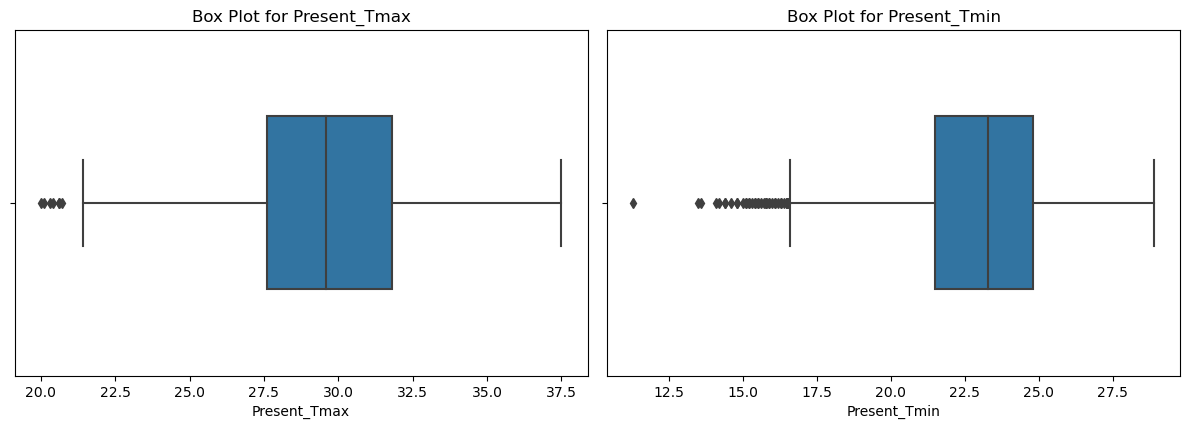

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of important columns
temp = ['Present_Tmax', 'Present_Tmin']

# Create a box plot for each important column
plt.figure(figsize=(12, 8))
for i, column in enumerate(temp, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], orient='vertical', width=0.5)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


**The code performs outlier detection and visualization for the 'Present_Tmax' and 'Present_Tmin' columns using box plots:**

 The code generates box plots for both 'Present_Tmax' and 'Present_Tmin' columns, allowing us to visually identify the presence of outliers. Outliers are data points that fall significantly below or above the whiskers of the box plot.


In [37]:
Q1 = df['Present_Tmax'].quantile(0.25)
Q3 = df['Present_Tmax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Present_Tmax'] < lower_bound) | (df['Present_Tmax'] > upper_bound)]
outliers

station       Date  Present_Tmax  Present_Tmin
2675      1.0 2014-08-14          20.6          18.2
2775      1.0 2014-08-18          20.4          17.9
5050      1.0 2016-07-16          20.7          17.8
5075      1.0 2016-07-17          20.6          18.5
6125      1.0 2016-08-28          20.1          15.6
7700      1.0 2017-08-29          20.3          15.7
7725      1.0 2017-08-30          20.0          15.1

In [38]:
Q1 = df['Present_Tmin'].quantile(0.25)
Q3 = df['Present_Tmin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Present_Tmin'] < lower_bound) | (df['Present_Tmin'] > upper_bound)]
outliers

station       Date  Present_Tmax  Present_Tmin
2150      1.0 2014-07-24          21.7          16.5
3041     17.0 2014-08-28          29.0          16.1
3525      1.0 2015-07-17          24.9          15.8
4591     17.0 2015-08-28          26.6          15.4
4616     17.0 2015-08-29          28.9          16.5
4641     17.0 2015-08-30          29.2          16.5
6100      1.0 2016-08-27          24.9          16.2
6101      2.0 2016-08-27          27.3          13.5
6109     10.0 2016-08-27          27.3          14.8
6115     16.0 2016-08-27          26.6          15.1
6116     17.0 2016-08-27          27.1          11.3
6118     19.0 2016-08-27          28.3          16.5
6125      1.0 2016-08-28          20.1          15.6
6151      2.0 2016-08-29          25.2          15.5
6159     10.0 2016-08-29          25.2          14.2
6166     17.0 2016-08-29          25.3          13.6
6168     19.0 2016-08-29          27.4          15.8
6175      1.0 2016-08-30          21.8          15.2
6176      2.0 2016-08-30          23.6          15.8
6184     10.0 2016-08-30          22.7          15.9
6191     17.0 2016-08-30          23.8          14.4
6193     19.0 2016-08-30          24.5          16.4
7634     10.0 2017-08-26          27.6          15.3
7641     17.0 2017-08-26          28.4          14.4
7651      2.0 2017-08-27          25.4          16.5
7666     17.0 2017-08-27          25.2          15.5
7675      1.0 2017-08-28          23.2          16.0
7700      1.0 2017-08-29          20.3          15.7
7711     12.0 2017-08-29          22.9          16.5
7716     17.0 2017-08-29          23.6          16.5
7718     19.0 2017-08-29          23.5          16.3
7725      1.0 2017-08-30          20.0          15.1
7726      2.0 2017-08-30          22.5          14.8
7729      5.0 2017-08-30          22.9          16.3
7732      8.0 2017-08-30          22.5          16.5
7733      9.0 2017-08-30          23.3          15.8
7734     10.0 2017-08-30          21.4          14.1
7735     11.0 2017-08-30          23.0          16.5
7736     12.0 2017-08-30          23.8          15.4
7739     15.0 2017-08-30          23.4          16.1
7740     16.0 2017-08-30          21.7          15.2
7741     17.0 2017-08-30          22.6          14.6
7743     19.0 2017-08-30          22.6          15.0
7744     20.0 2017-08-30          22.7          15.9

**Outlier Detection:**  calculated the lower and upper bounds for outlier detection using the IQR (Interquartile Range) method. Any data points below the lower bound or above the upper bound are considered outliers.

**Outliers Detected:** The code lists and displays the outliers for both 'Present_Tmax' and 'Present_Tmin' columns, showing the station, date, 'Present_Tmax,' and 'Present_Tmin' values for each outlier.



The code performs outlier detection for the 'Present_Tmax' and 'Present_Tmin' columns, which represent the maximum and minimum daily temperatures, respectively. The box plots visually illustrate the distribution of temperature data, making it easy to identify outliers.

For 'Present_Tmax':
- Outliers are detected for specific dates, including August 14, 2014, August 18, 2014, July 16, 2016, and others. These outliers likely indicate extreme weather events or data anomalies where the recorded maximum temperature significantly deviates from the norm.

For 'Present_Tmin':
- Outliers are also observed on various dates, such as July 24, 2014, August 28, 2014, August 27, 2016, and others. Similar to 'Present_Tmax,' these outliers suggest unusual minimum temperatures.

The detection of outliers is a crucial step in data preprocessing for weather forecasting. These outliers may result from various factors, including sensor errors, measurement inaccuracies, or genuine extreme weather conditions.

## **Handling the outliers**

**Handling outliers through Winsorization is a common practice in data preprocessing for time series forecasting**

**Winsorized** mean is a method of averaging that initially replaces the smallest and largest values with the observations closest to them.

Winsorization helps preprocess the data by managing outliers, resulting in a more stable and suitable dataset for building accurate weather forecasting models.


**Winsorization Process:** The code applies Winsorization to the 'Present_Tmax' column within each month group. Winsorization replaces extreme values (outliers) with values at a specified percentile (in this case, the 5th percentile and 95th percentile) within the same month. This technique helps mitigate the impact of outliers on forecasting models.



In [39]:

df.index = pd.to_datetime(df.index)

lower_percentile = 0.05  # Adjust these percentiles as needed
upper_percentile = 0.95

# Create a function to Winsorize a group
def winsorize_group(group):
    lower_bound = group.quantile(lower_percentile)
    upper_bound = group.quantile(upper_percentile)
    return group.clip(lower_bound, upper_bound)

# Apply Winsorizing to the 'Present_Tmin' column within each month group
df['Winsorized_Tmin'] = df.groupby(df.index.month)['Present_Tmin'].transform(winsorize_group)

# Apply Winsorizing to the 'Present_Tmax' column within each month group
df['Winsorized_Tmax'] = df.groupby(df.index.month)['Present_Tmax'].transform(winsorize_group)

# Print the DataFrame with Winsorized 'Present_Tmin' and 'Present_Tmax' values
print(df[['Present_Tmin', 'Winsorized_Tmin', 'Present_Tmax', 'Winsorized_Tmax']])



                               Present_Tmin  Winsorized_Tmin  Present_Tmax  \
1970-01-01 00:00:00.000000175          20.1             20.1          25.9   
1970-01-01 00:00:00.000000176          20.9             20.9          28.5   
1970-01-01 00:00:00.000000177          23.0             23.0          28.5   
1970-01-01 00:00:00.000000178          22.6             22.6          28.7   
1970-01-01 00:00:00.000000179          21.8             21.8          30.8   
...                                     ...              ...           ...   
1970-01-01 00:00:00.000007745          17.8             18.9          23.1   
1970-01-01 00:00:00.000007746          17.4             18.9          22.5   
1970-01-01 00:00:00.000007747          17.1             18.9          23.3   
1970-01-01 00:00:00.000007748          17.7             18.9          23.3   
1970-01-01 00:00:00.000007749          17.4             18.9          23.2   

                               Winsorized_Tmax  
1970-01-01 00:

**The Winsorizing technique** has successfully removed extreme values from the 'Present_Tmin' and 'Present_Tmax' columns, ensuring a more robust dataset for temperature forecasting, which may lead to more reliable temperature predictions.

In [40]:
# Drop the original 'Present_Tmin' and 'Present_Tmax' columns
df.drop(['Present_Tmin', 'Present_Tmax'], axis=1, inplace=True)

# Rename the 'Winsorized' columns to their original names
df.rename(columns={'Winsorized_Tmin': 'Present_Tmin', 'Winsorized_Tmax': 'Present_Tmax'}, inplace=True)
df.head()

station       Date  Present_Tmin  Present_Tmax
1970-01-01 00:00:00.000000175      1.0 2013-07-07          20.1          25.9
1970-01-01 00:00:00.000000176      2.0 2013-07-07          20.9          28.5
1970-01-01 00:00:00.000000177      3.0 2013-07-07          23.0          28.5
1970-01-01 00:00:00.000000178      4.0 2013-07-07          22.6          28.7
1970-01-01 00:00:00.000000179      5.0 2013-07-07          21.8          30.8

The original 'Present_Tmin' and 'Present_Tmax' columns have been replaced with their Winsorized versions, ensuring that extreme values are mitigated while maintaining the same column names for consistency in the dataset.

### Since our data records for min and max temperatures we want to split it into two parts: df_Tmax & df_Tmin

In [41]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df['station'] = pd.Categorical(df['station'])

# Split the data into two separate DataFrames
df_Tmax = df[['station', 'Present_Tmax']].copy()
df_Tmin = df[['station', 'Present_Tmin']].copy()


# Group the DataFrames by 'station'
df_Tmax.groupby('station')
df_Tmin.groupby('station')


In [42]:
df.head()

station  Present_Tmin  Present_Tmax
Date                                          
2013-07-07     1.0          20.1          25.9
2013-07-07    25.0          22.9          29.3
2013-07-07    24.0          22.8          29.4
2013-07-07    23.0          22.7          29.4
2013-07-07    22.0          22.9          29.1

In [43]:
df_Tmax.head()

station  Present_Tmax
Date                            
2013-07-07     1.0          25.9
2013-07-07    25.0          29.3
2013-07-07    24.0          29.4
2013-07-07    23.0          29.4
2013-07-07    22.0          29.1

In [44]:
df_Tmin.head()

station  Present_Tmin
Date                            
2013-07-07     1.0          20.1
2013-07-07    25.0          22.9
2013-07-07    24.0          22.8
2013-07-07    23.0          22.7
2013-07-07    22.0          22.9

### Now we want to see the stations that we have in our data, to put each station in different data frame.

In [45]:
df['station'].unique()

C:\Users\marah salahat\anaconda3\Lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[1.0, 25.0, 24.0, 23.0, 22.0, ..., 8.0, 9.0, 10.0, 11.0, 7.0]
Length: 25
Categories (25, float64): [1.0, 2.0, 3.0, 4.0, ..., 22.0, 23.0, 24.0, 25.0]

The unique stations in the data are represented by a range of float values from 1.0 to 25.0, which appear to be categorical labels for different weather stations in the dataset. These stations can be separated into individual dataframes for further modeling.

## Check stationarity for each station:

### For dt_Tmax :

Station 1.0:
ADF Statistic: -6.718379328963031
p-value: 3.5341243126627603e-09
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


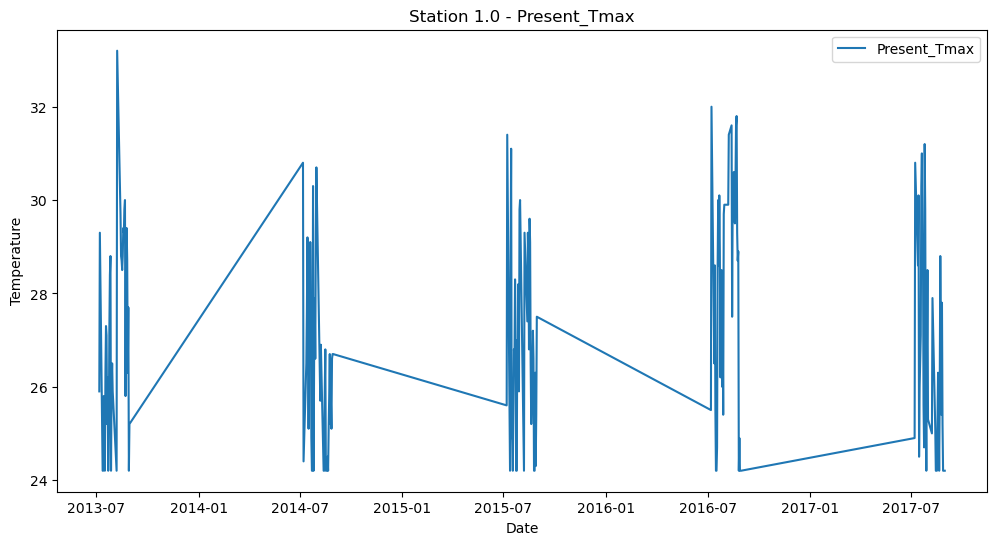

Station 2.0:
ADF Statistic: -8.995951479936265
p-value: 6.694266958444158e-15
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


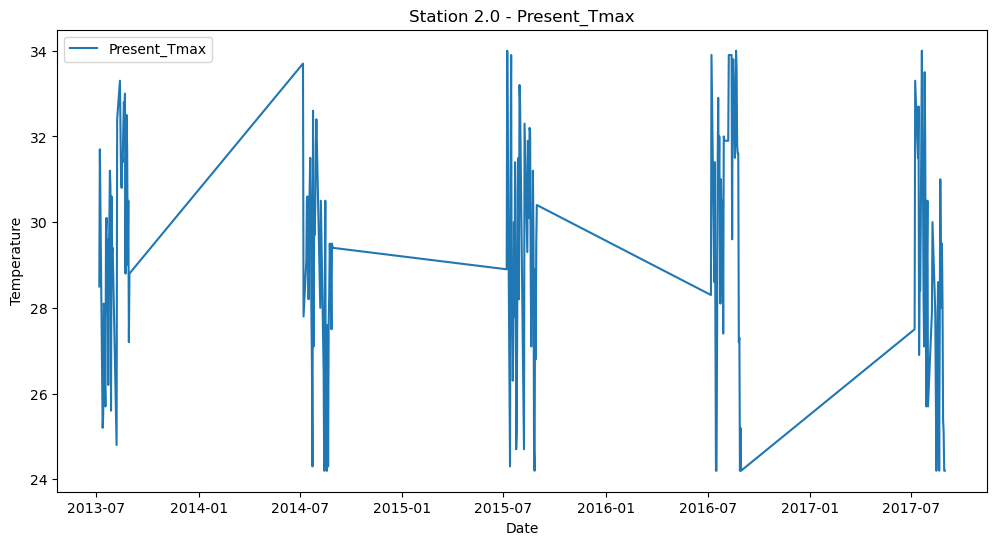

Station 3.0:
ADF Statistic: -5.069620739872053
p-value: 1.613090180099429e-05
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


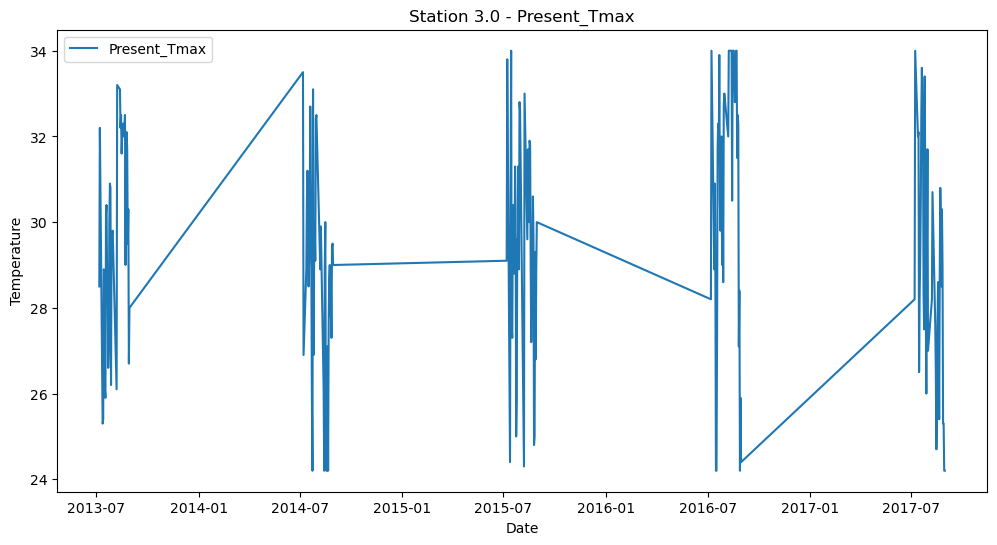

Station 4.0:
ADF Statistic: -8.670820251266548
p-value: 4.551588134726134e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


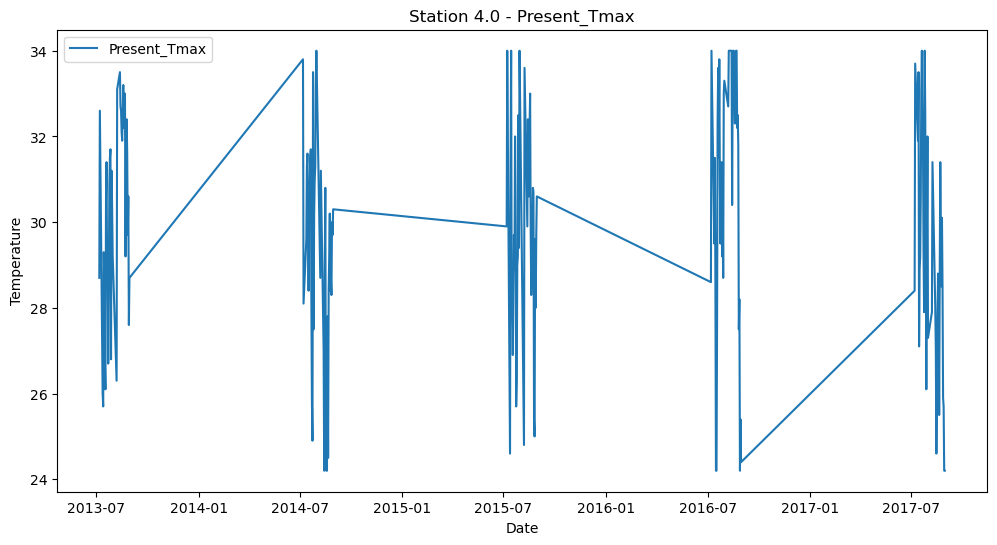

Station 5.0:
ADF Statistic: -4.860972684622656
p-value: 4.15164113996589e-05
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


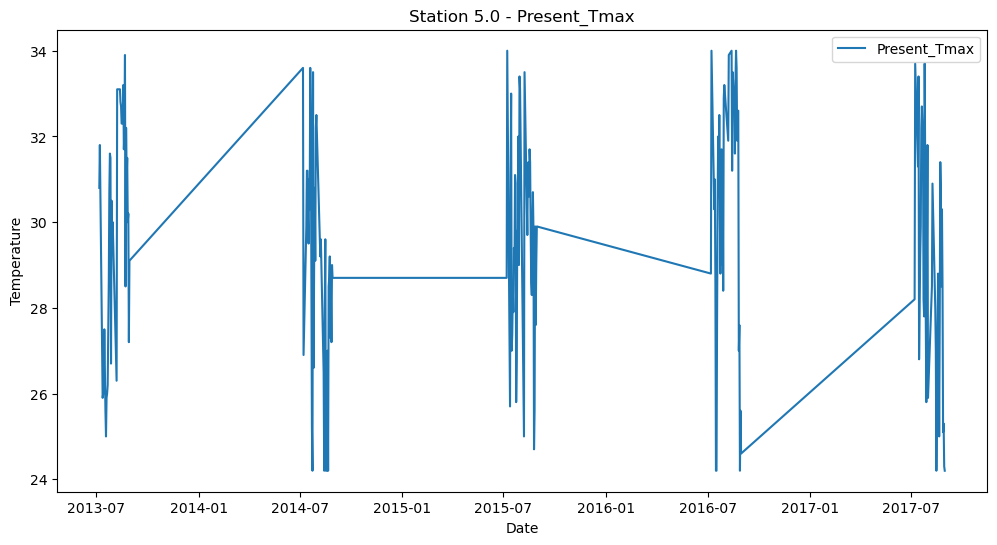

Station 6.0:
ADF Statistic: -8.604764714628628
p-value: 6.718825990539609e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


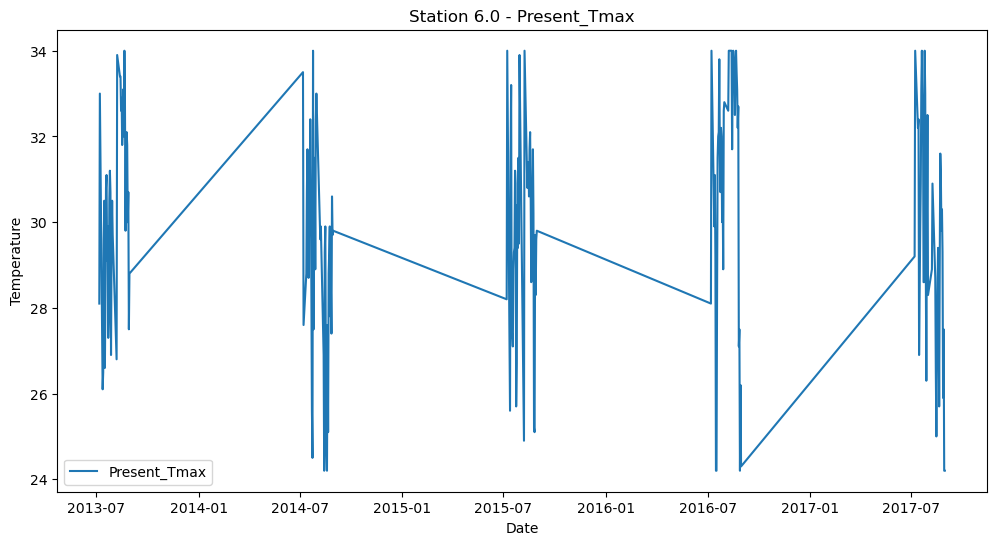

Station 7.0:
ADF Statistic: -8.637643160661392
p-value: 5.534969916818023e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


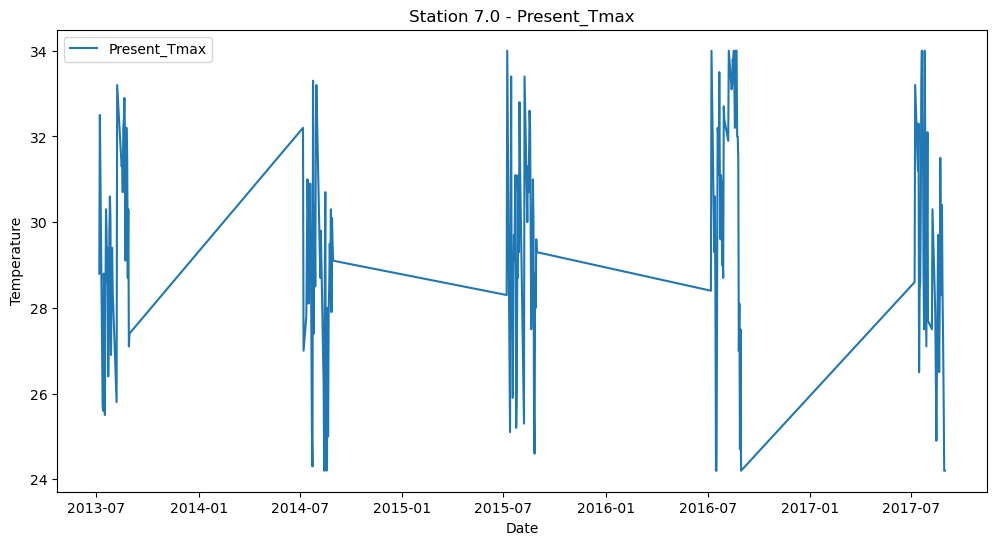

Station 8.0:
ADF Statistic: -5.152903511255019
p-value: 1.0962366174728164e-05
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


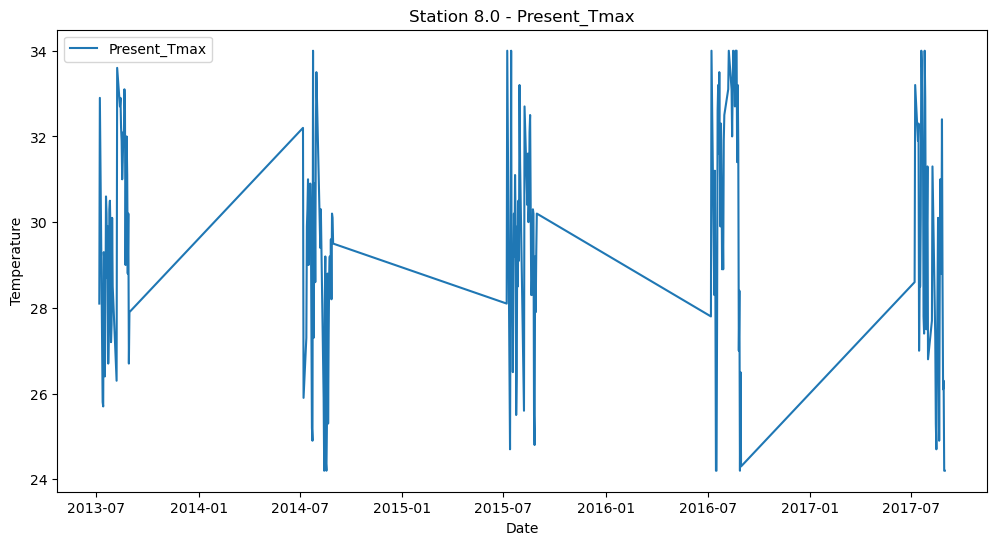

Station 9.0:
ADF Statistic: -5.22706608225085
p-value: 7.739699723544189e-06
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


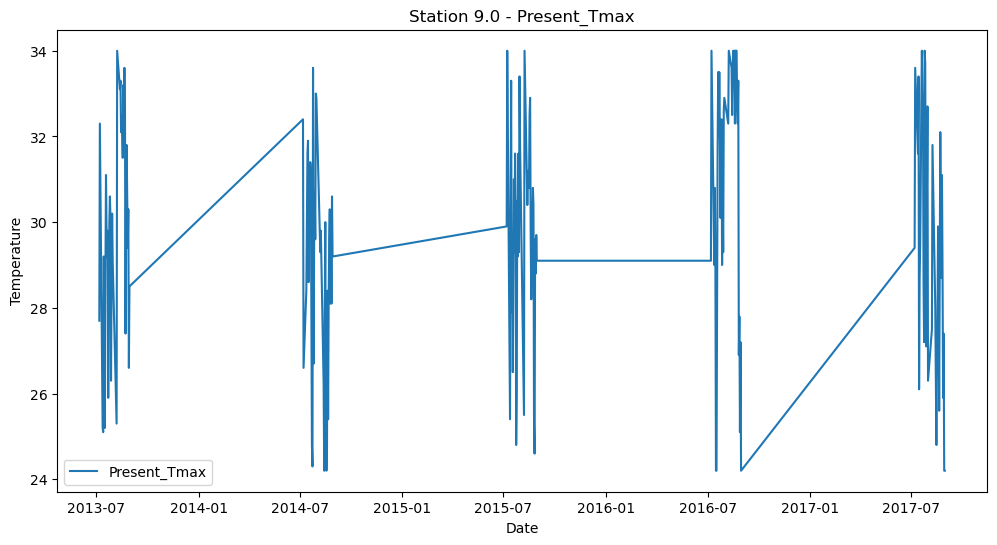

Station 10.0:
ADF Statistic: -5.209733980073067
p-value: 8.39856282470633e-06
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


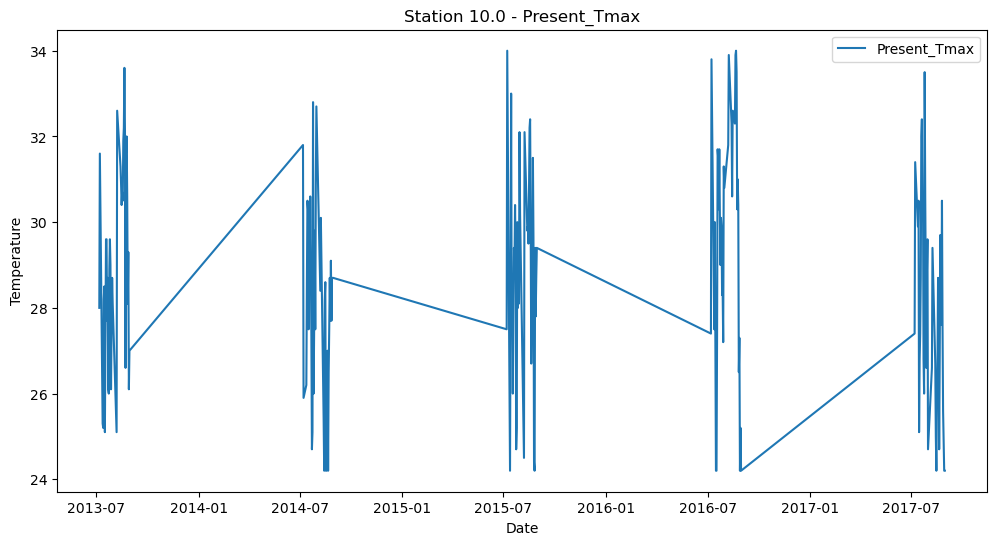

Station 11.0:
ADF Statistic: -8.664600762838047
p-value: 4.721597974647066e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


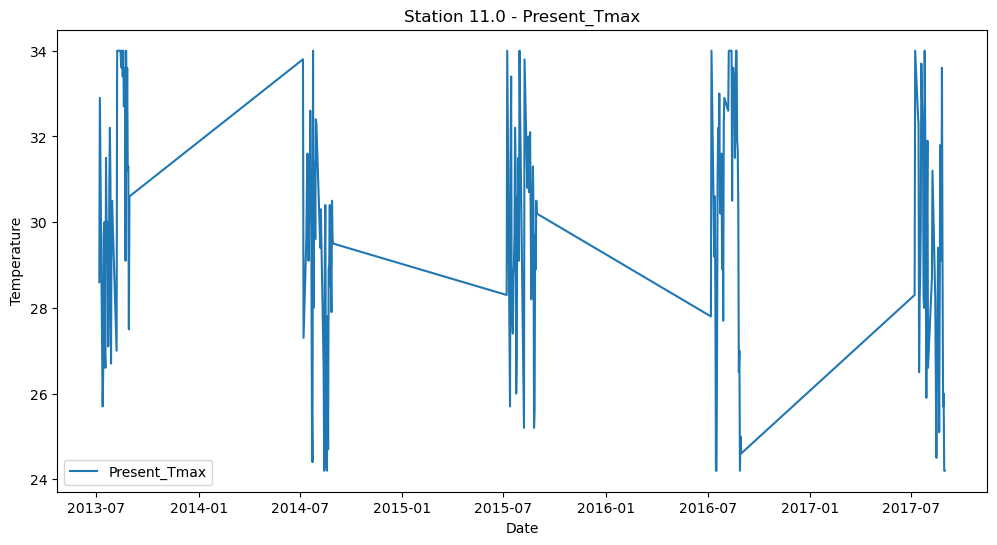

Station 12.0:
ADF Statistic: -5.2656851265344295
p-value: 6.446772042920812e-06
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


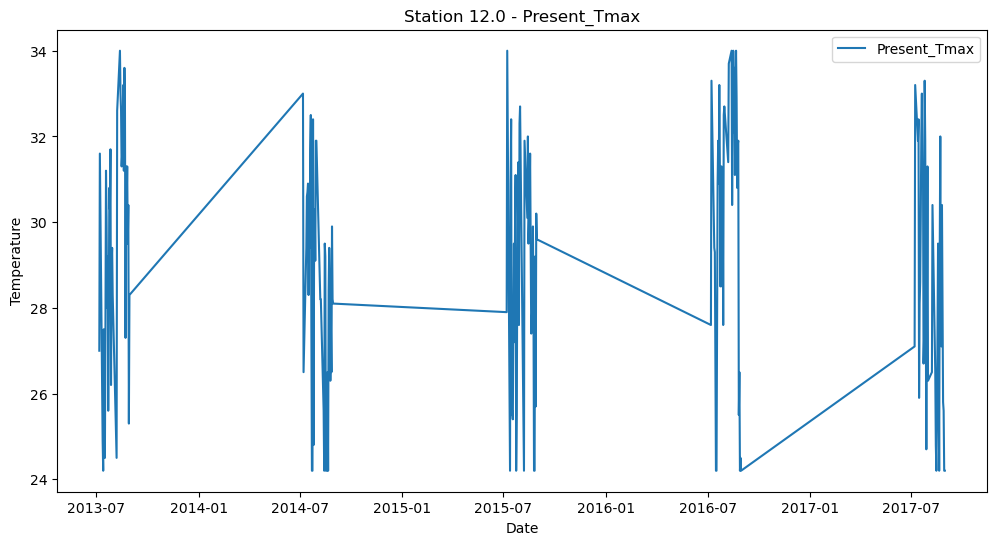

Station 13.0:
ADF Statistic: -8.96712987512346
p-value: 7.933373099590514e-15
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


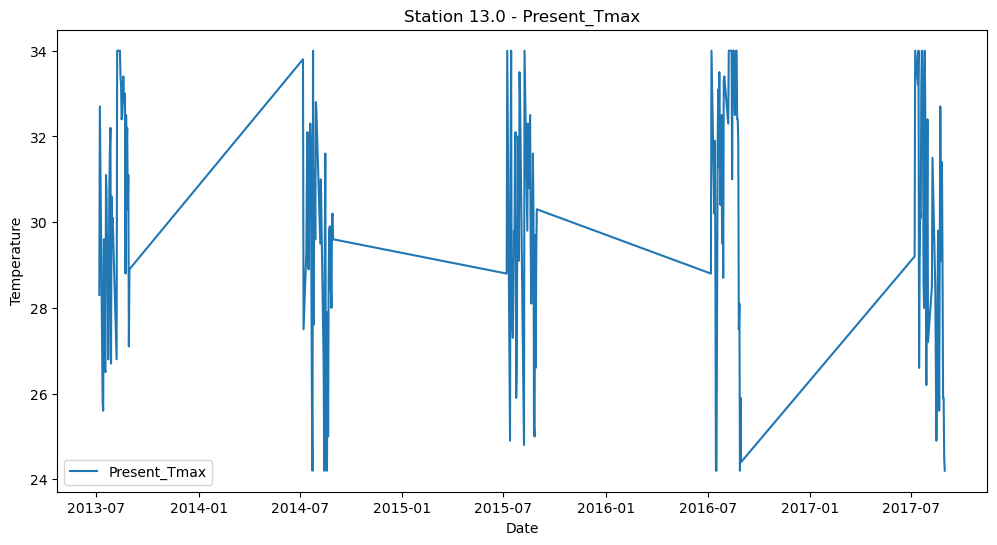

Station 14.0:
ADF Statistic: -5.115017054373671
p-value: 1.3076321361158726e-05
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


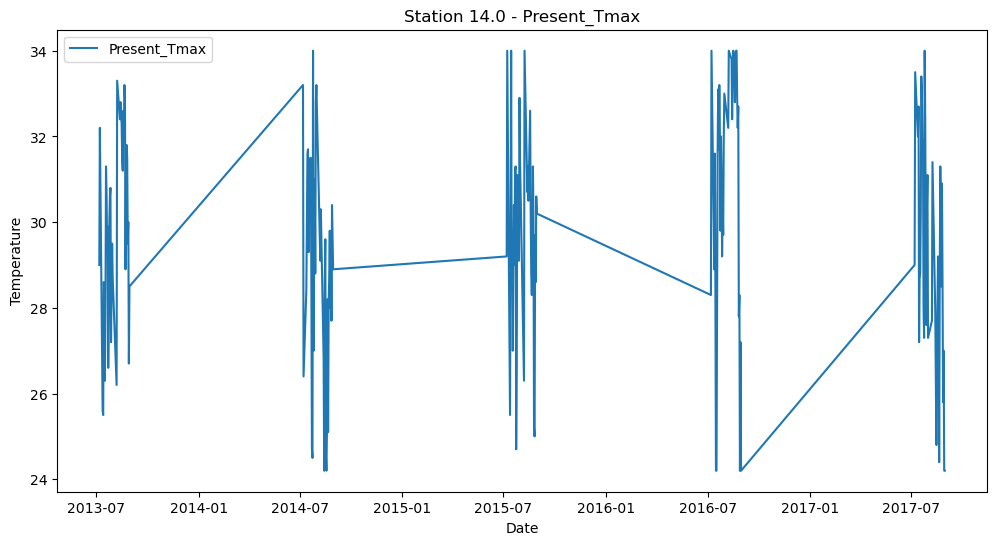

Station 15.0:
ADF Statistic: -8.794665263970604
p-value: 2.192858004119897e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


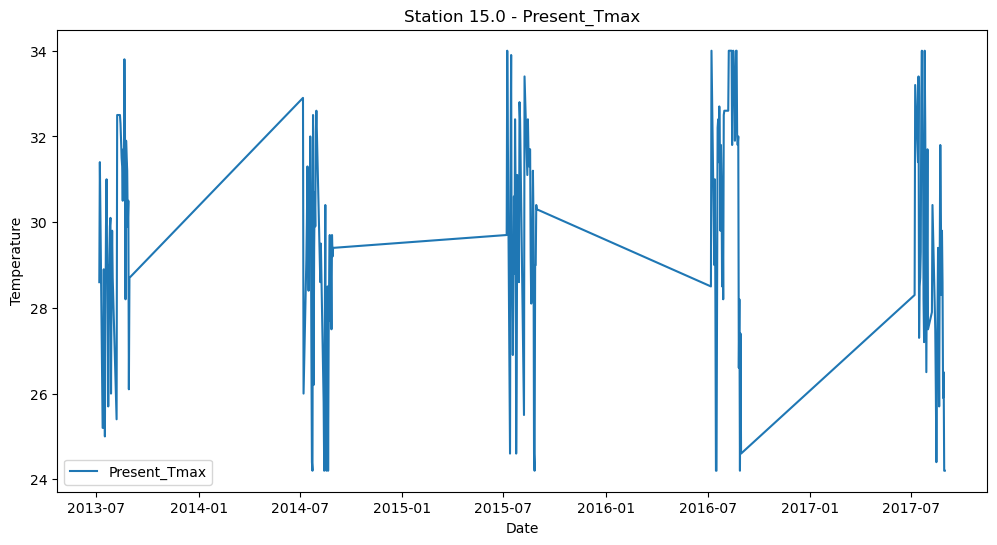

Station 16.0:
ADF Statistic: -5.252832566892938
p-value: 6.851888895344001e-06
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


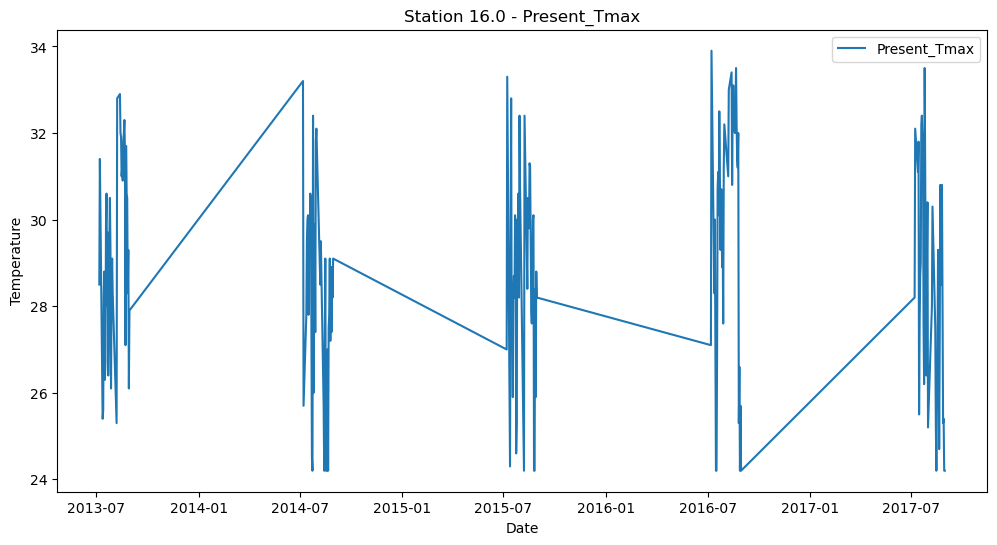

Station 17.0:
ADF Statistic: -6.749222543357309
p-value: 2.9804704063792573e-09
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


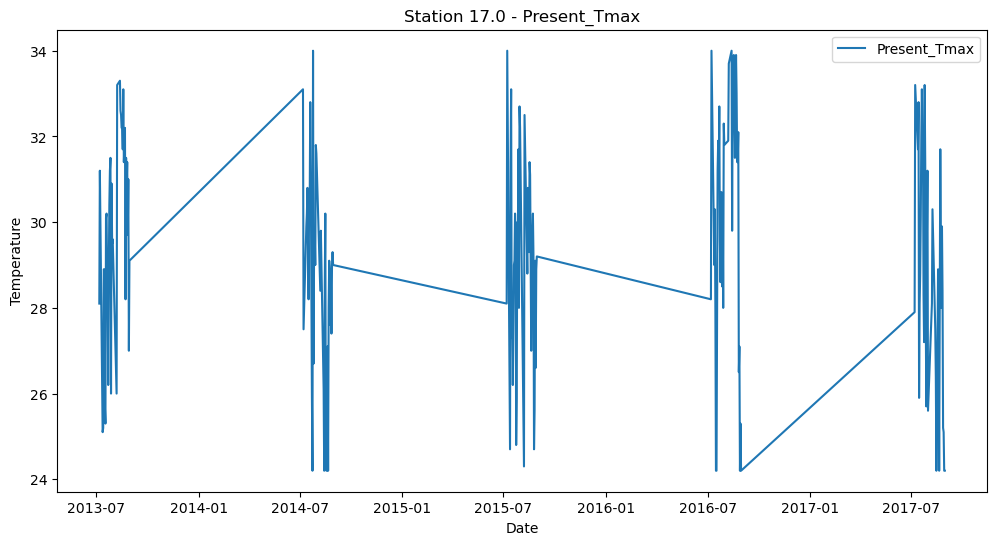

Station 18.0:
ADF Statistic: -8.775417909345395
p-value: 2.4564120517353957e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


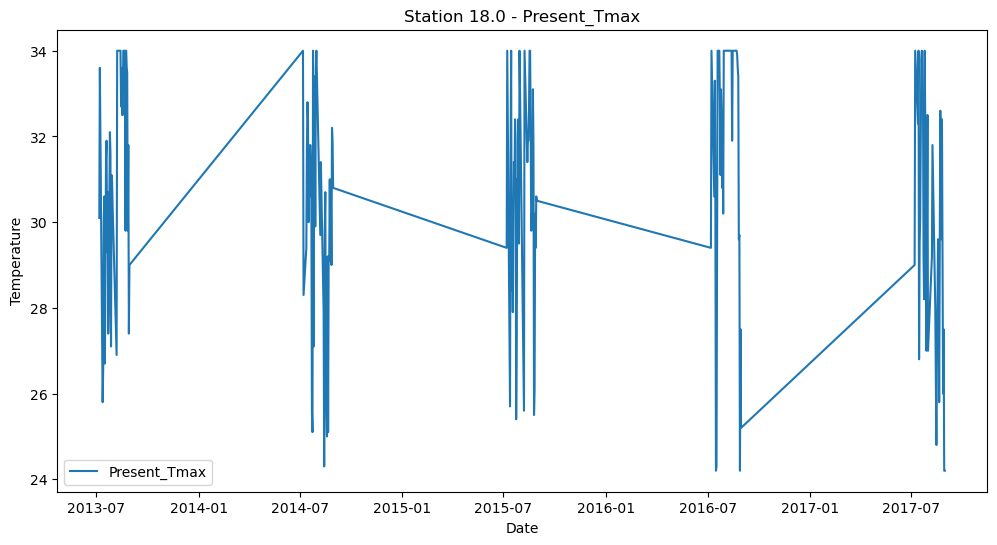

Station 19.0:
ADF Statistic: -5.149921608311816
p-value: 1.1115981052722403e-05
Critical Values:
1%: -3.4631437906252636
5%: -2.8759570379821047
10%: -2.574454682874228
Stationary (Reject null hypothesis)


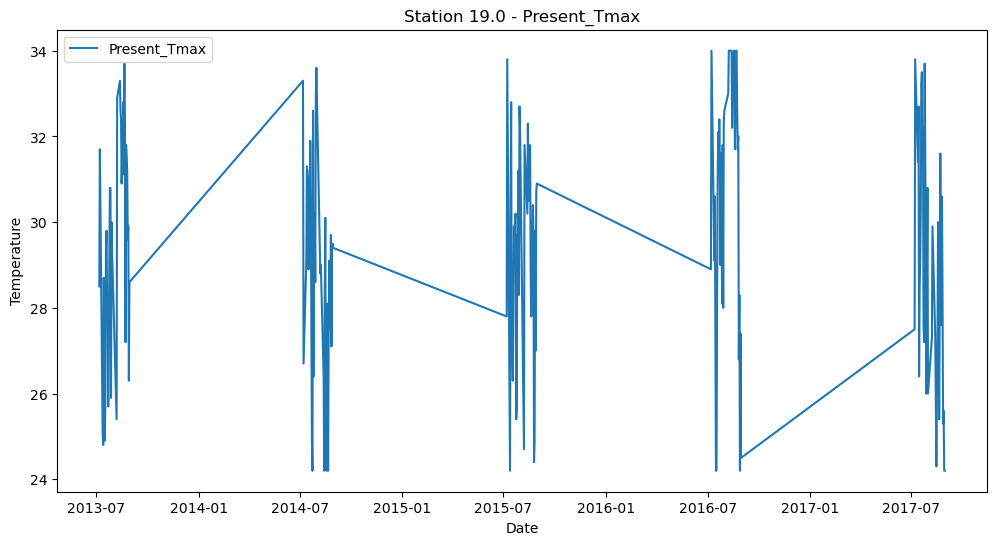

Station 20.0:
ADF Statistic: -8.686453273429308
p-value: 4.1507917309327495e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


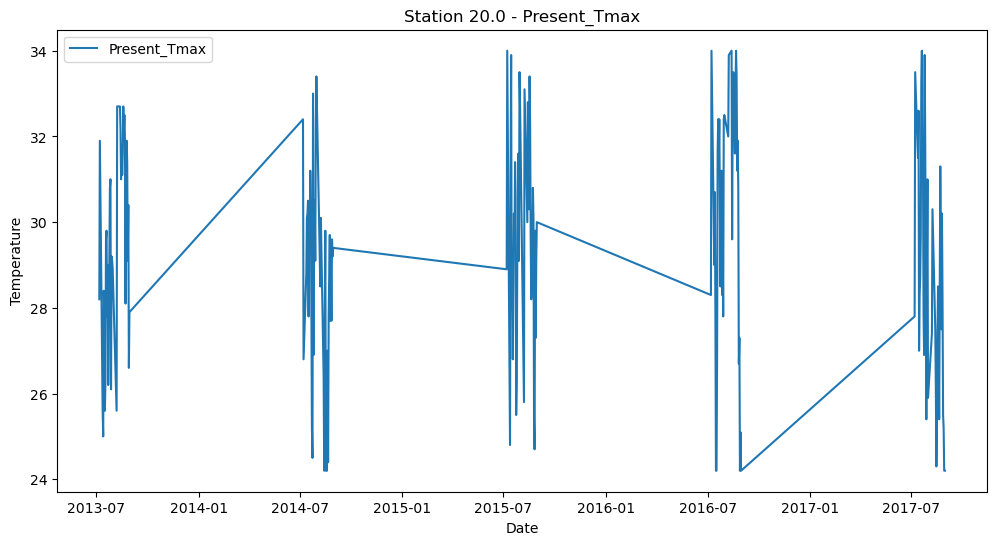

Station 21.0:
ADF Statistic: -8.688450977425145
p-value: 4.1021851588785124e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


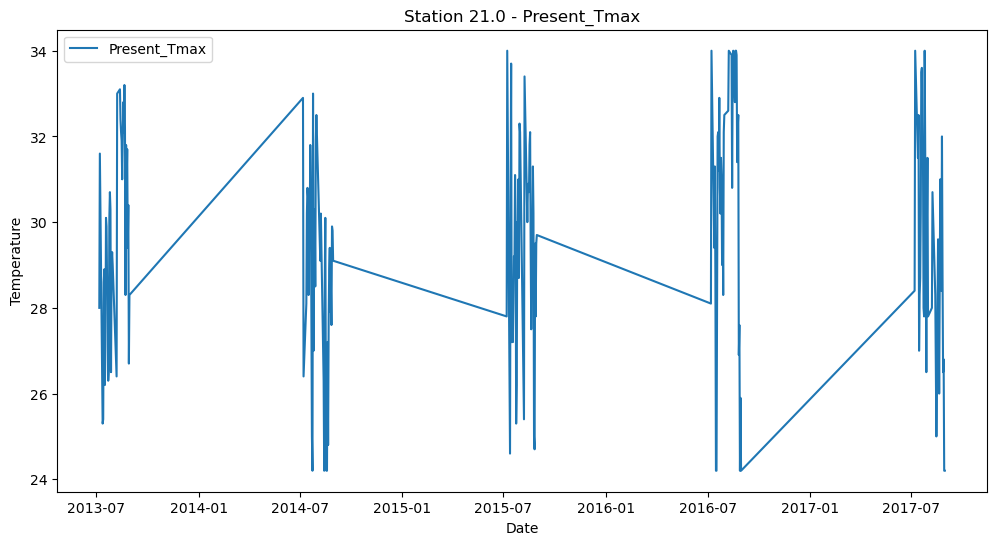

Station 22.0:
ADF Statistic: -6.63577180190449
p-value: 5.567809754912557e-09
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


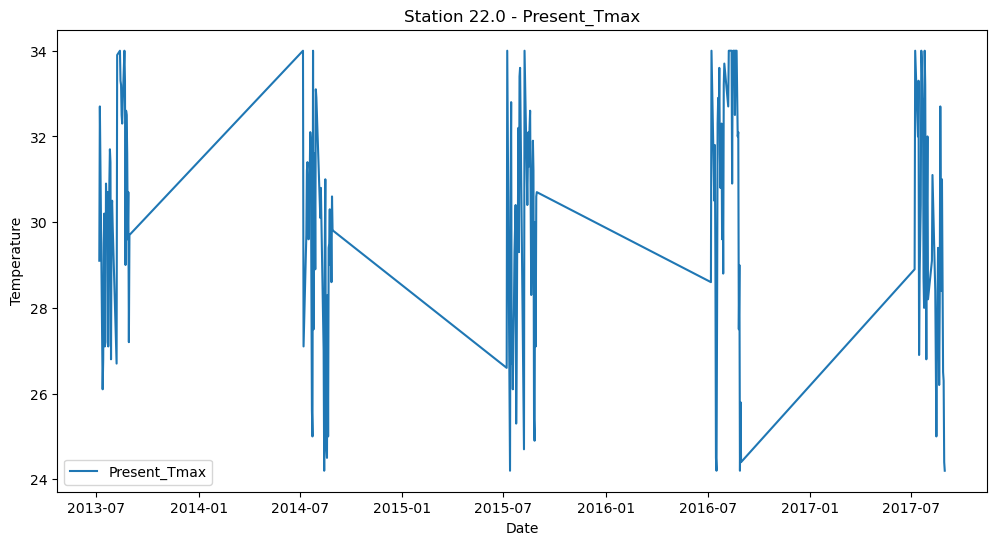

Station 23.0:
ADF Statistic: -8.471527868675334
p-value: 1.4732111273040876e-13
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


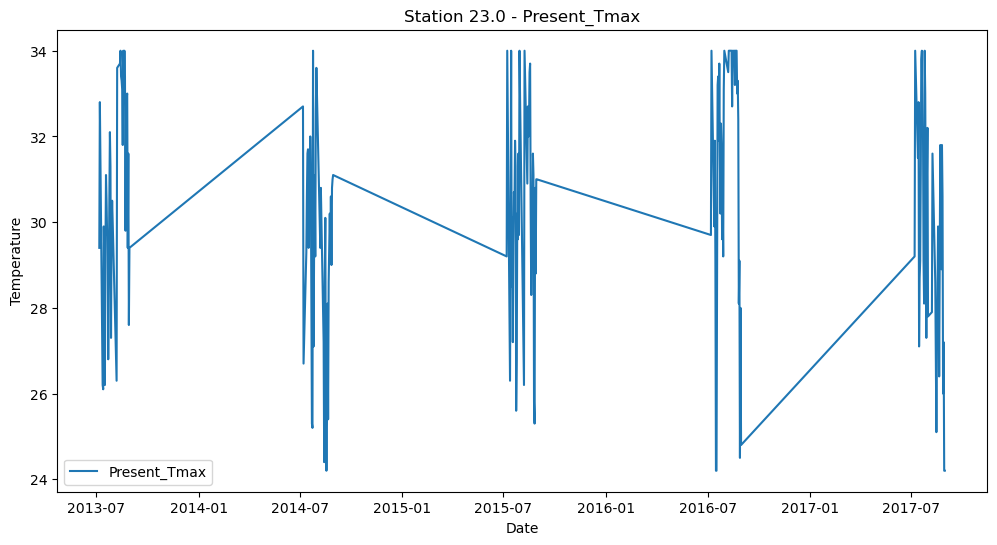

Station 24.0:
ADF Statistic: -8.622266254782899
p-value: 6.060184356520784e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


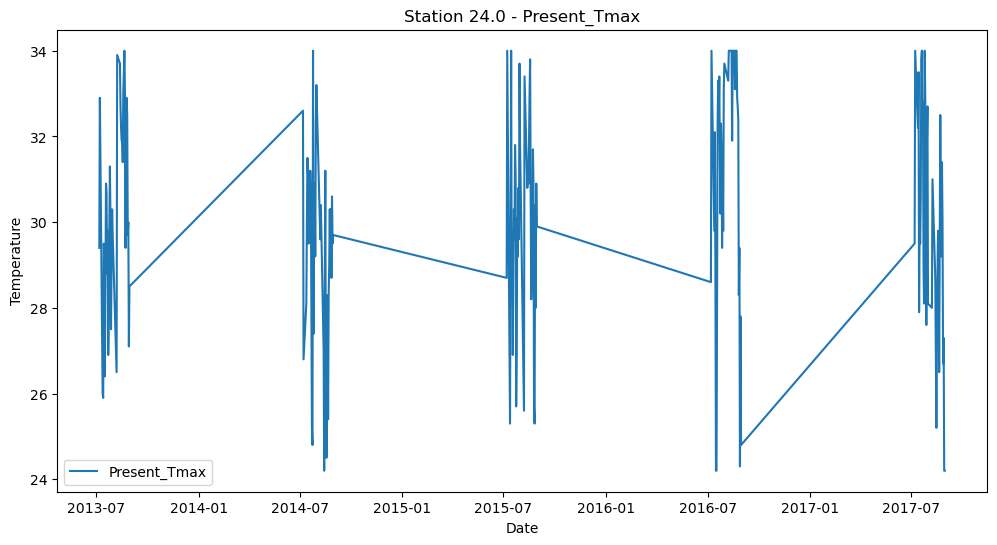

Station 25.0:
ADF Statistic: -8.589491250897712
p-value: 7.351802287434696e-14
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
Stationary (Reject null hypothesis)


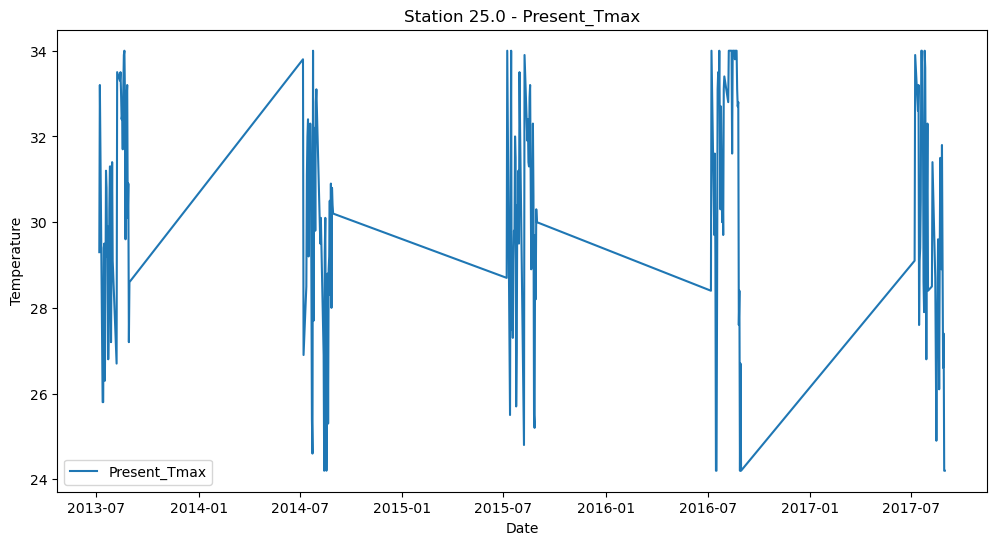

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


for station_id, station_df in df_Tmax.groupby('station'):
    # Check stationarity of 'Present_Tmax'
    result = adfuller(station_df['Present_Tmax'], autolag='AIC')
    
    # Print station ID
    print(f"Station {station_id}:")
    
    # Print ADF test results
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    # Plot 'Present_Tmax' for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(station_df.index, station_df['Present_Tmax'], label='Present_Tmax')
    plt.title(f'Station {station_id} - Present_Tmax')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    
    # Print whether the series is stationary or not
    if result[1] <= 0.05:
        print("Stationary (Reject null hypothesis)")
    else:
        print("Not stationary (Fail to reject null hypothesis)")
    
    plt.show()


**Based on the results  provided, it appears that for each station (from Station 1.0 to Station 25.0), The ADF (Augmented Dickey-Fuller) test results for all stations' 'Present_Tmax' time series indicate strong stationarity, as evidenced by significantly low p-values ranging from approximately 1e-15 to 3e-9. This implies that there is no evidence of a unit root, and the 'Present_Tmax' data for all stations can be considered stationary for time series analysis and forecasting purposes :)**



**Stationary data** means that the statistical properties of the data, such as mean, variance, and autocorrelation, do not change over time. 

**Non-stationary** data often exhibit trends or seasonality, which can make it more challenging to model and predict.

### For df_Tmin:

Station 1.0:
ADF Statistic: -4.240418390980052
p-value: 0.0005624460463026103
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


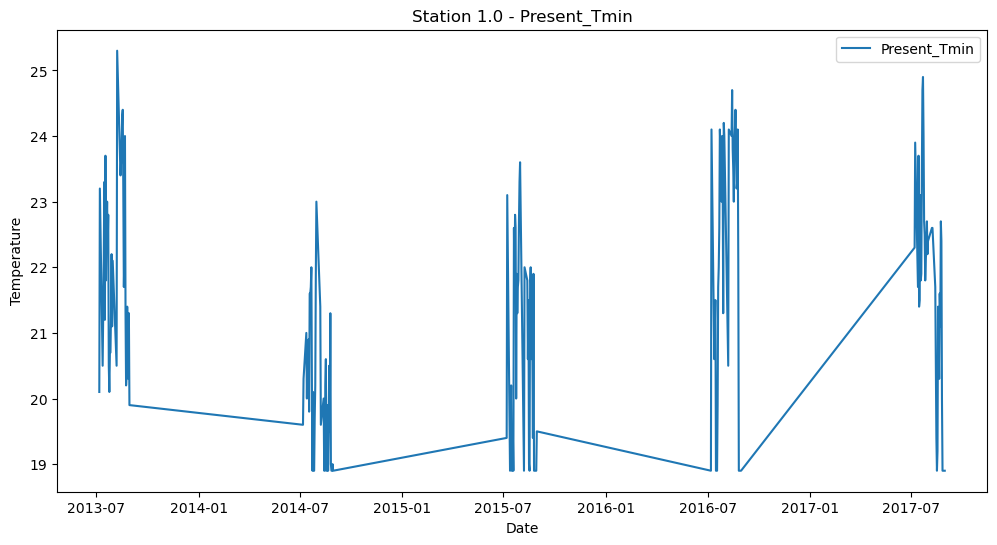

Station 2.0:
ADF Statistic: -4.457441170734419
p-value: 0.00023455128509146346
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


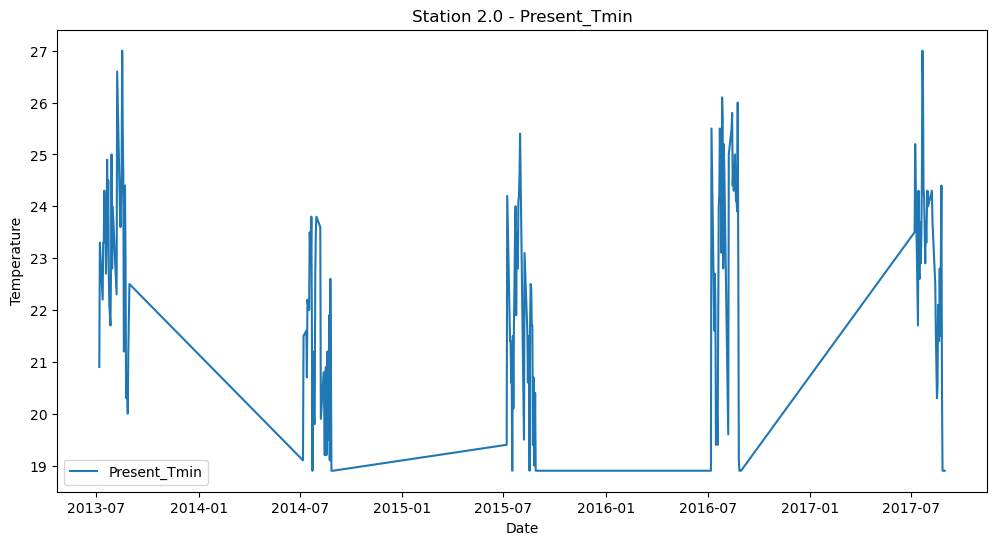

Station 3.0:
ADF Statistic: -4.63066619158801
p-value: 0.00011336254725559414
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


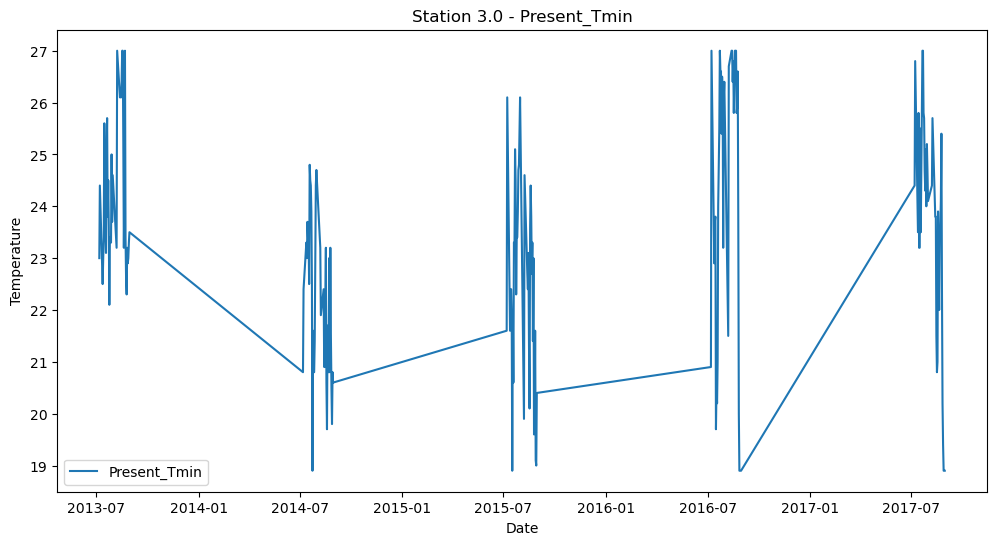

Station 4.0:
ADF Statistic: -4.811762006181401
p-value: 5.16372174334748e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


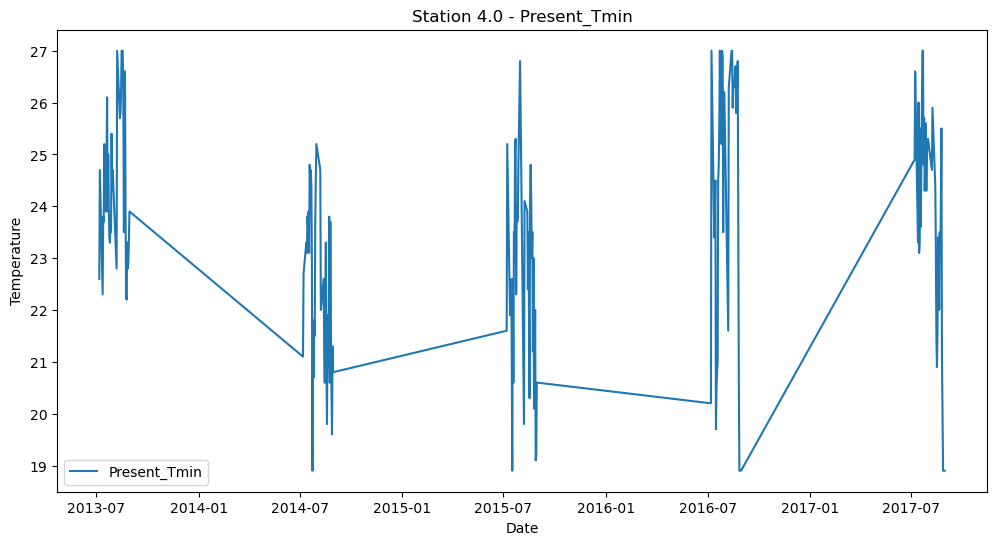

Station 5.0:
ADF Statistic: -4.959999162478639
p-value: 2.661500262543597e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


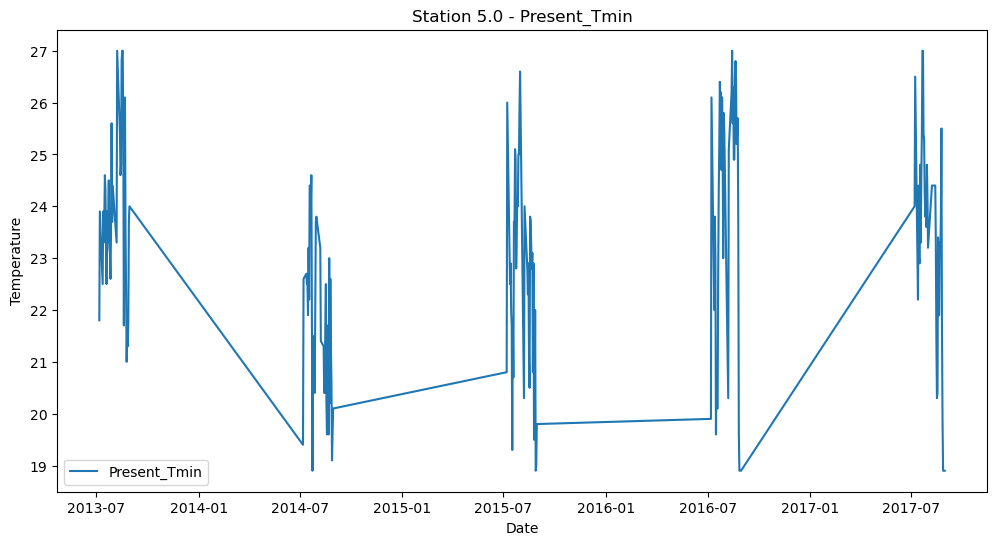

Station 6.0:
ADF Statistic: -5.144312767840505
p-value: 1.141058610328453e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


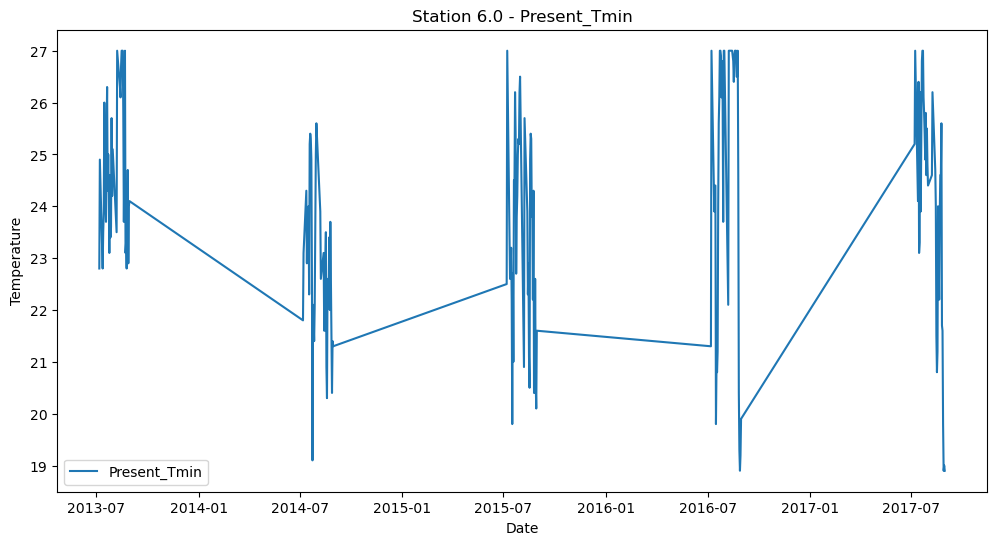

Station 7.0:
ADF Statistic: -4.468342049850729
p-value: 0.0002242281534064544
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


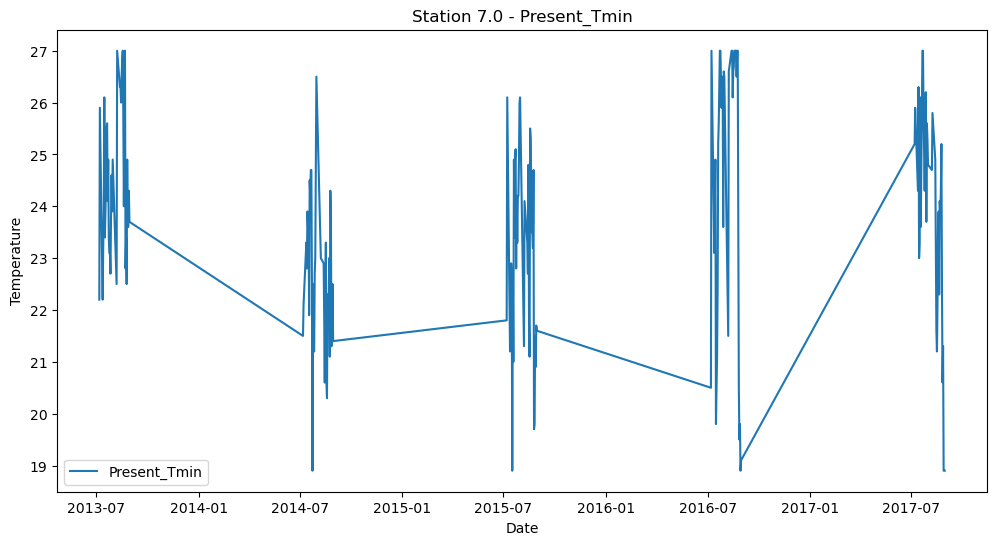

Station 8.0:
ADF Statistic: -4.508445092382909
p-value: 0.00018984496083436844
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


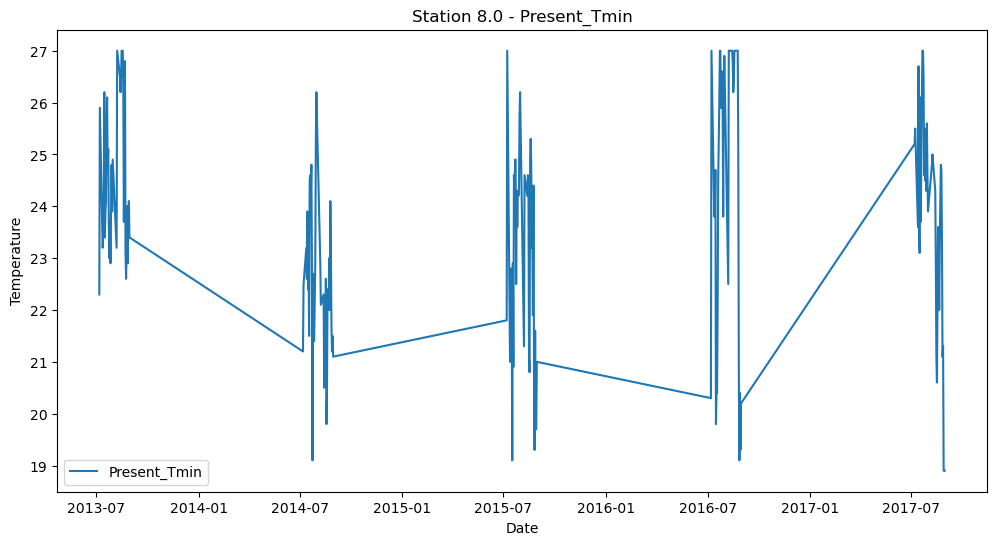

Station 9.0:
ADF Statistic: -4.374124933655263
p-value: 0.0003297446117409484
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


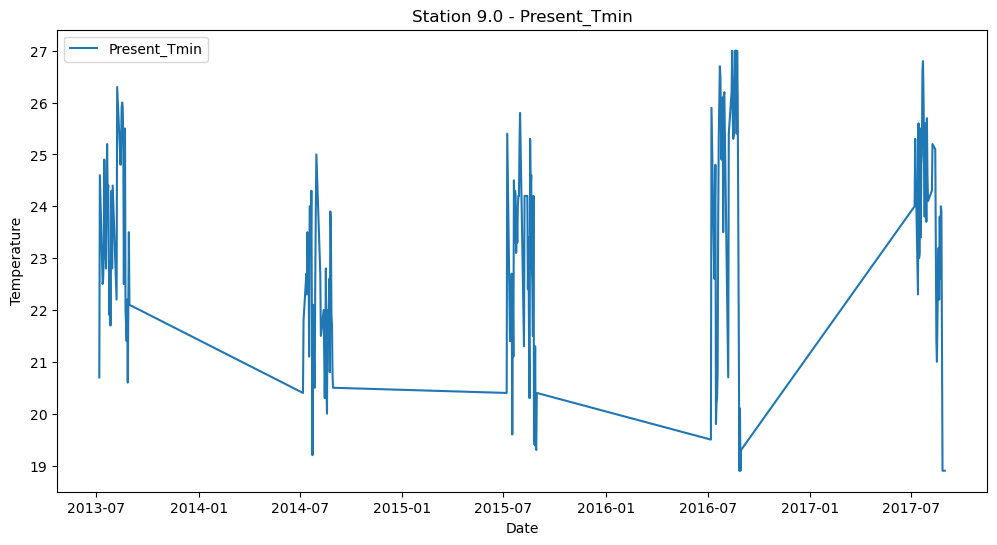

Station 10.0:
ADF Statistic: -4.921282147126204
p-value: 3.169611248809767e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


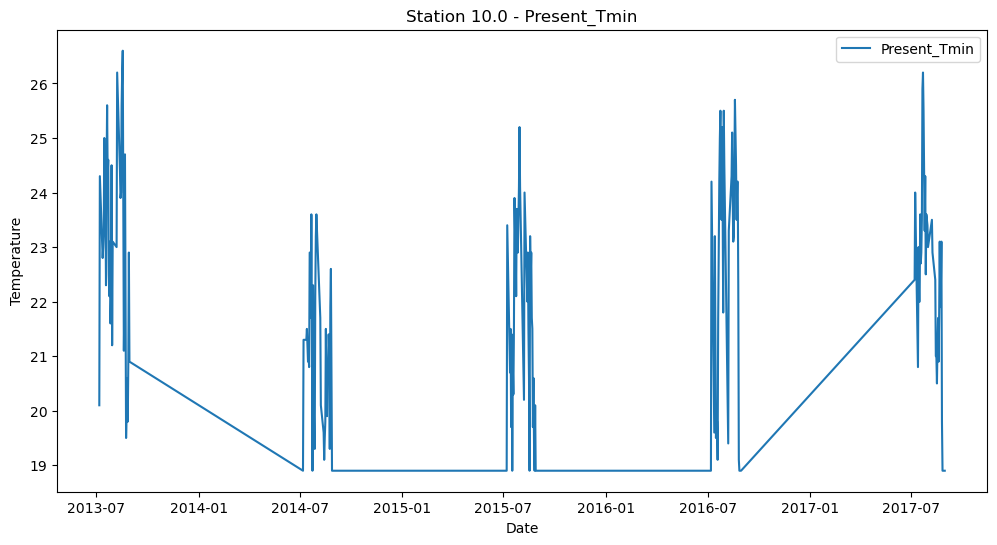

Station 11.0:
ADF Statistic: -4.891802139022581
p-value: 3.617863568815028e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


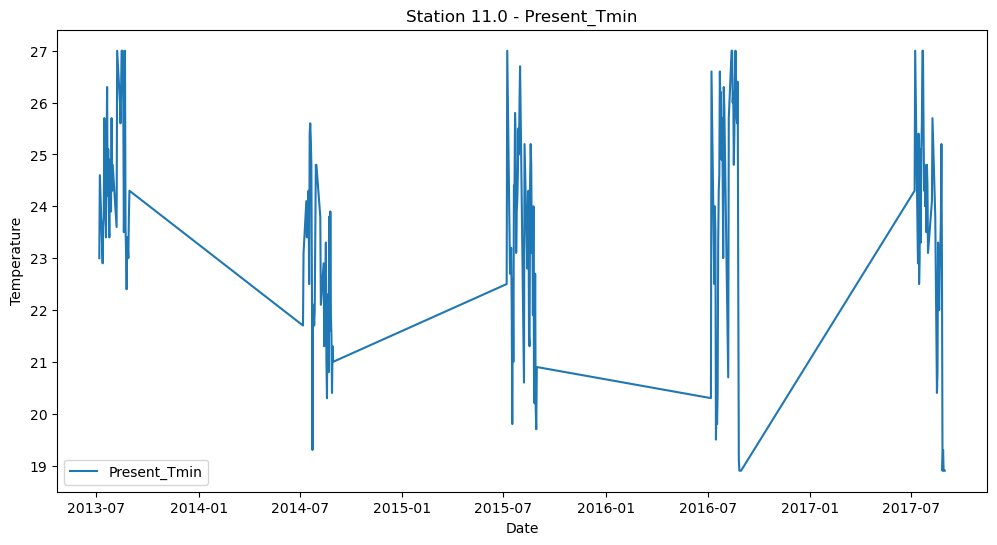

Station 12.0:
ADF Statistic: -4.956624730914497
p-value: 2.702460503007684e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


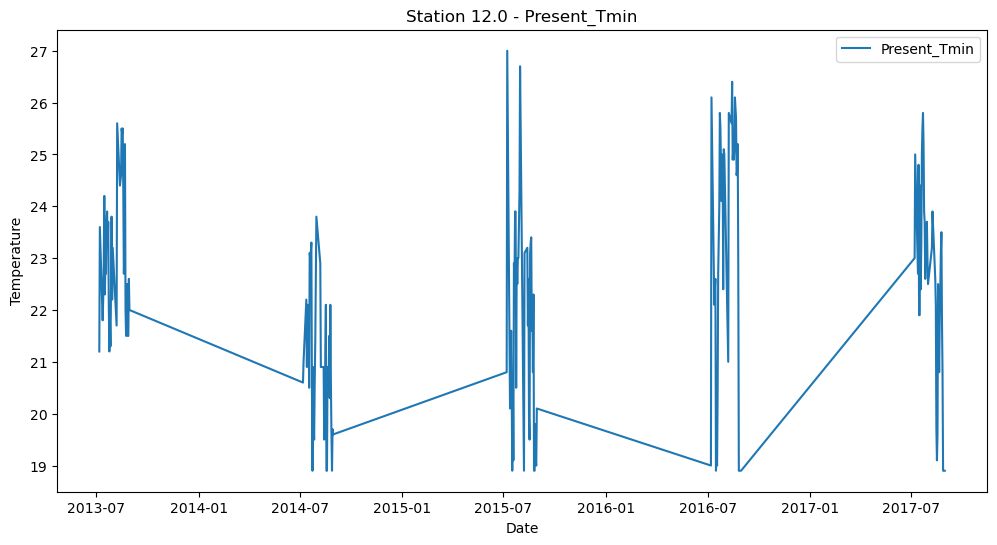

Station 13.0:
ADF Statistic: -4.869344825357543
p-value: 3.999635737489146e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


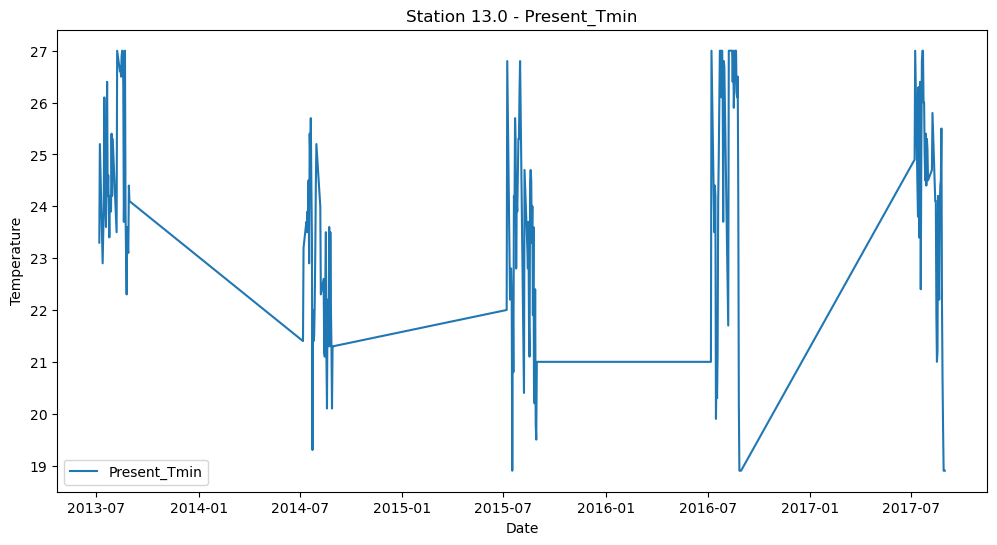

Station 14.0:
ADF Statistic: -4.554499778434068
p-value: 0.00015654992823341135
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


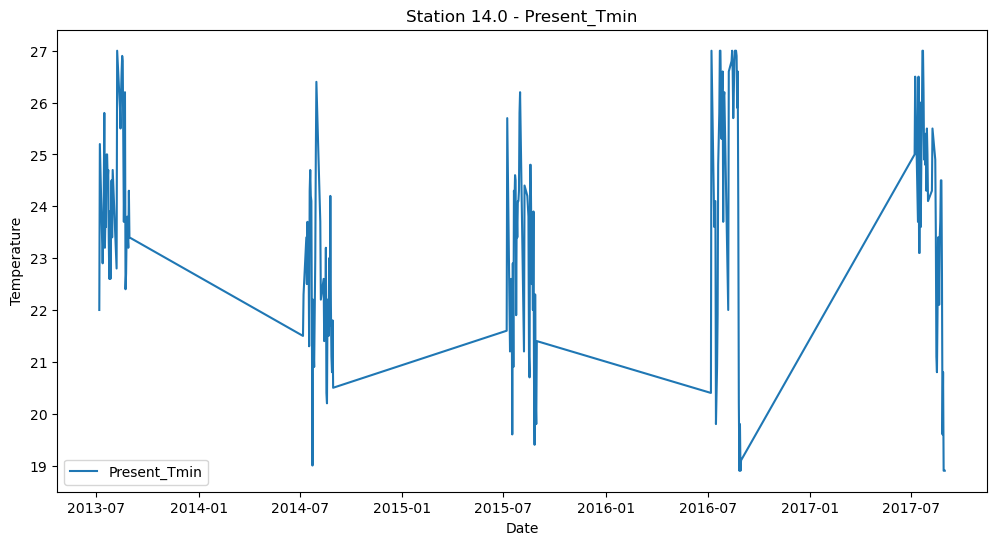

Station 15.0:
ADF Statistic: -4.667660454528267
p-value: 9.674665735608695e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


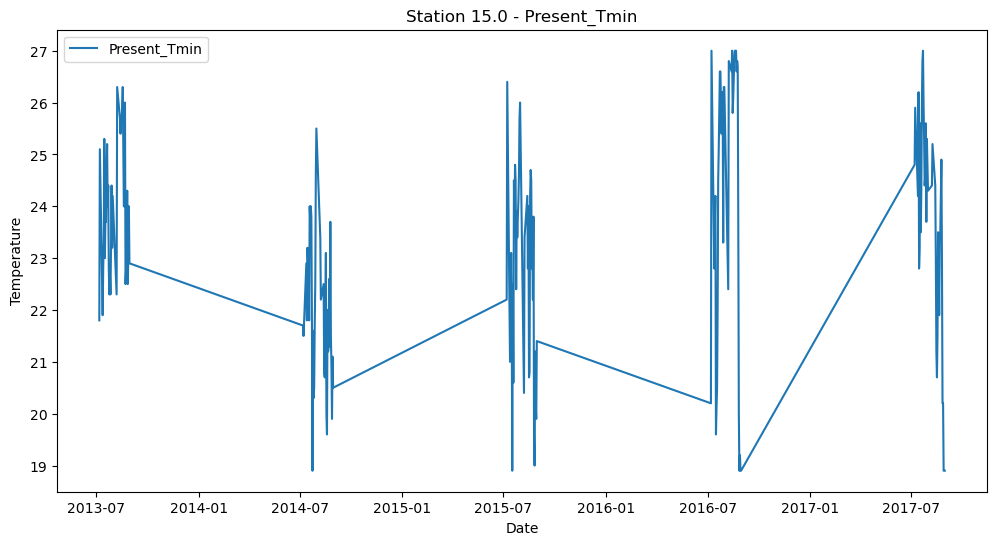

Station 16.0:
ADF Statistic: -4.933560260804063
p-value: 2.999133924186927e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


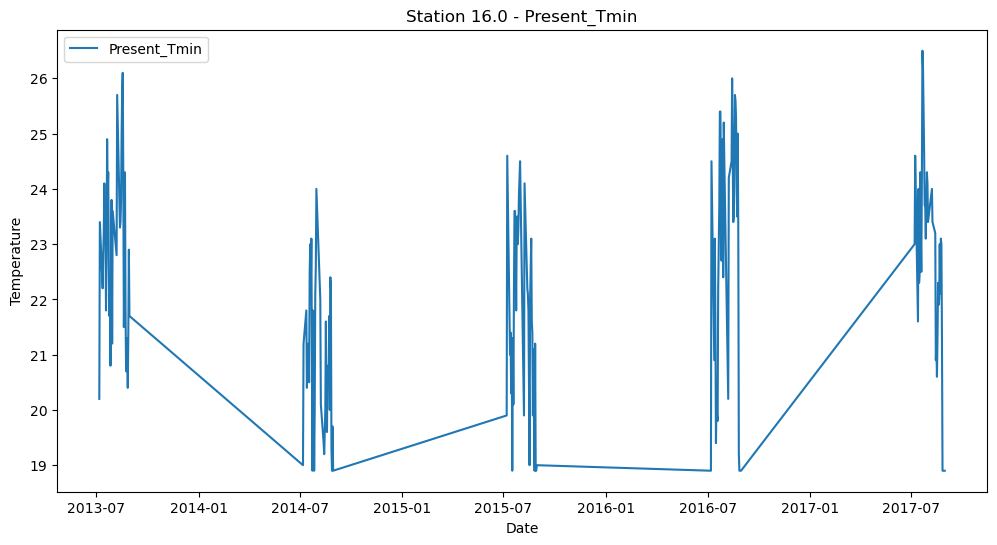

Station 17.0:
ADF Statistic: -5.003746798518097
p-value: 2.1817324720485067e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


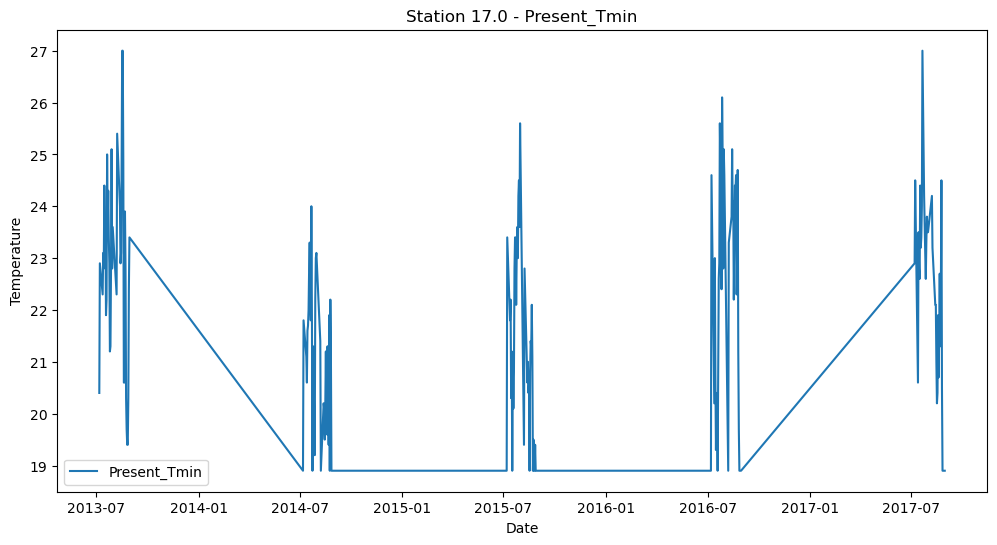

Station 18.0:
ADF Statistic: -4.876352968569594
p-value: 3.876522551828845e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


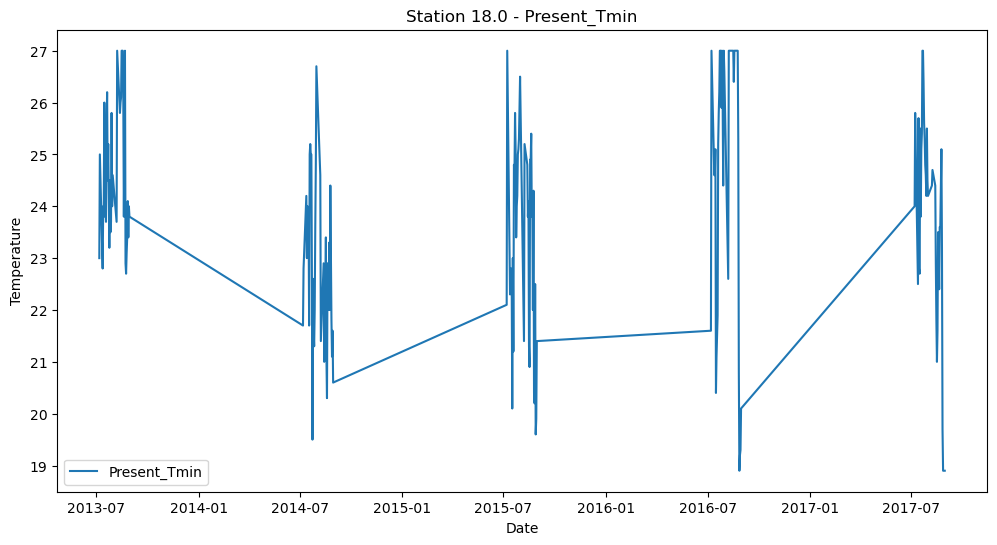

Station 19.0:
ADF Statistic: -4.8575059080457015
p-value: 4.216196685271584e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


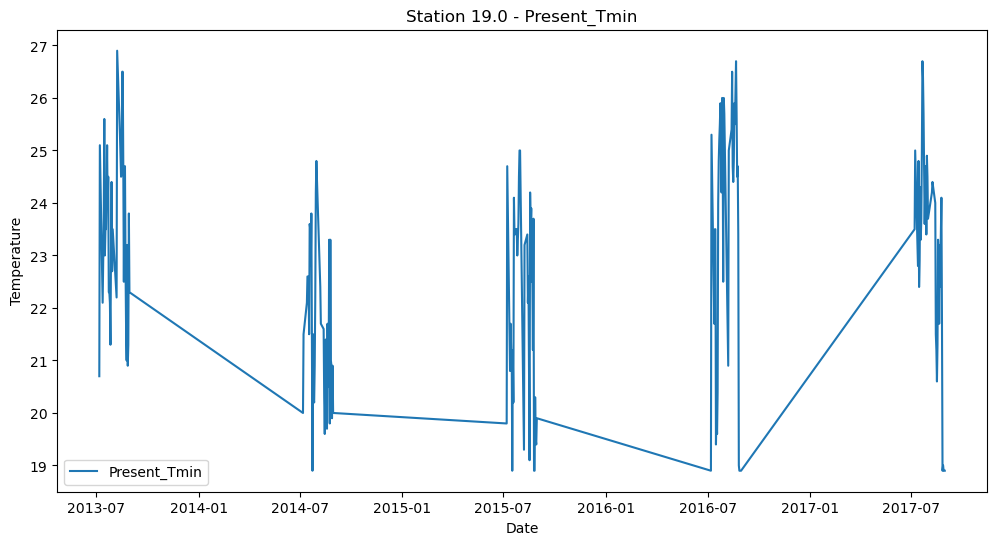

Station 20.0:
ADF Statistic: -4.862808780685575
p-value: 4.1178367386960946e-05
Critical Values:
1%: -3.462980134086401
5%: -2.875885461947131
10%: -2.5744164898444515
Stationary (Reject null hypothesis)


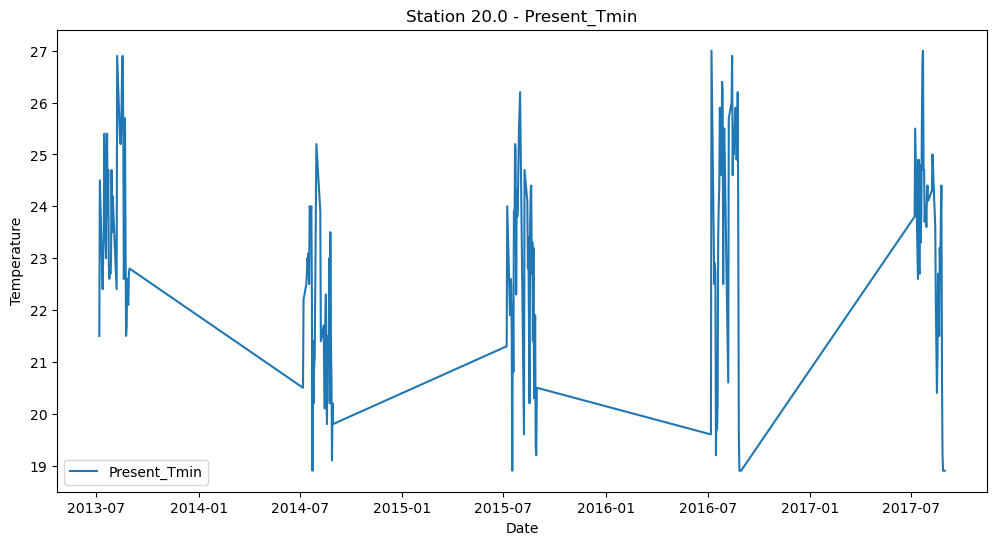

Station 21.0:
ADF Statistic: -4.815540009856239
p-value: 5.0782976581870414e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


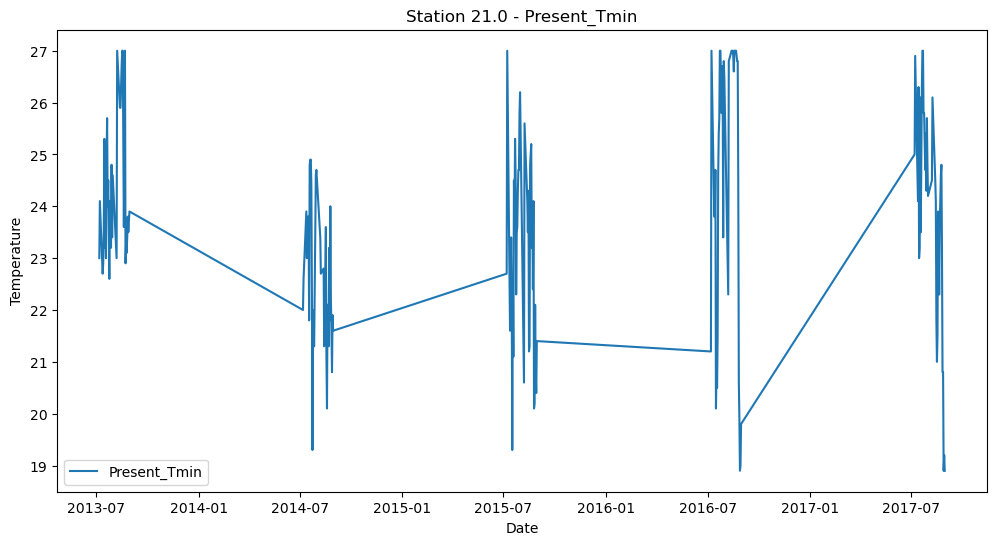

Station 22.0:
ADF Statistic: -4.690215004068793
p-value: 8.778757593882492e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


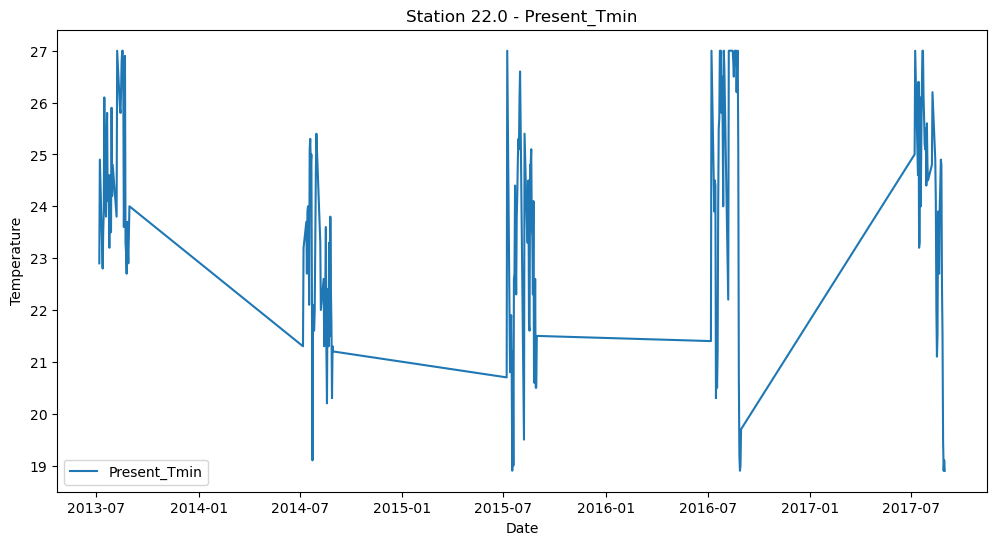

Station 23.0:
ADF Statistic: -4.529162054608095
p-value: 0.00017410963976458154
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


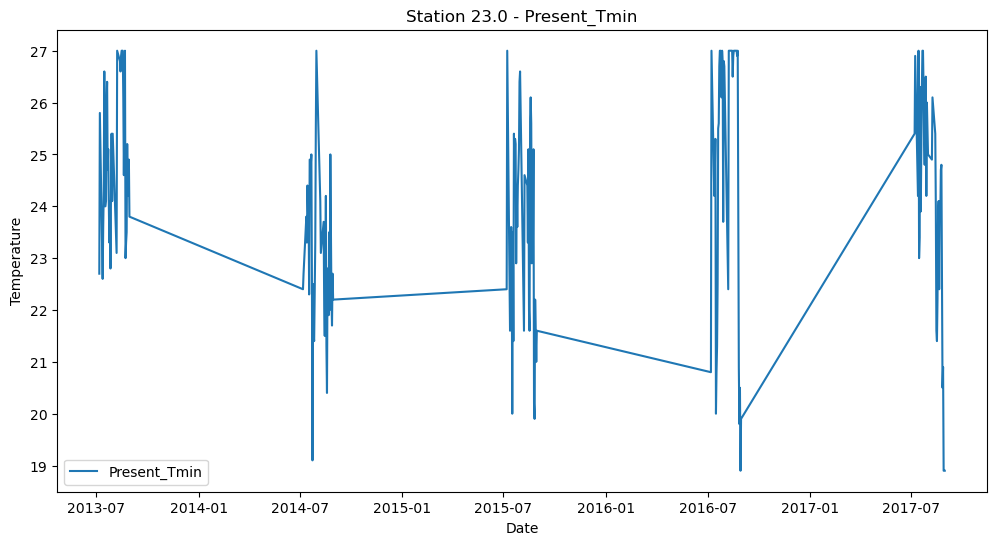

Station 24.0:
ADF Statistic: -4.546914834815262
p-value: 0.00016162125453918704
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


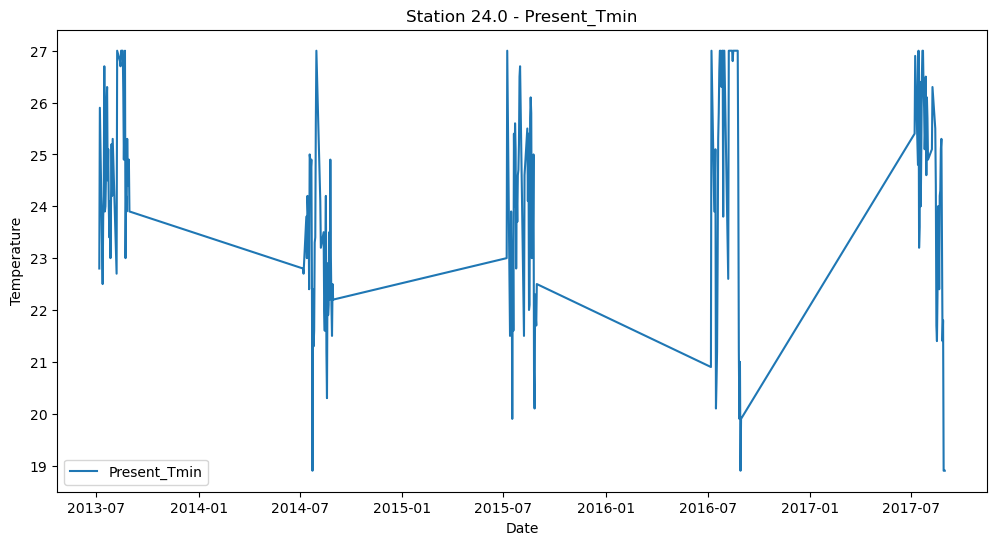

Station 25.0:
ADF Statistic: -4.930631754583247
p-value: 3.038974902540513e-05
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
Stationary (Reject null hypothesis)


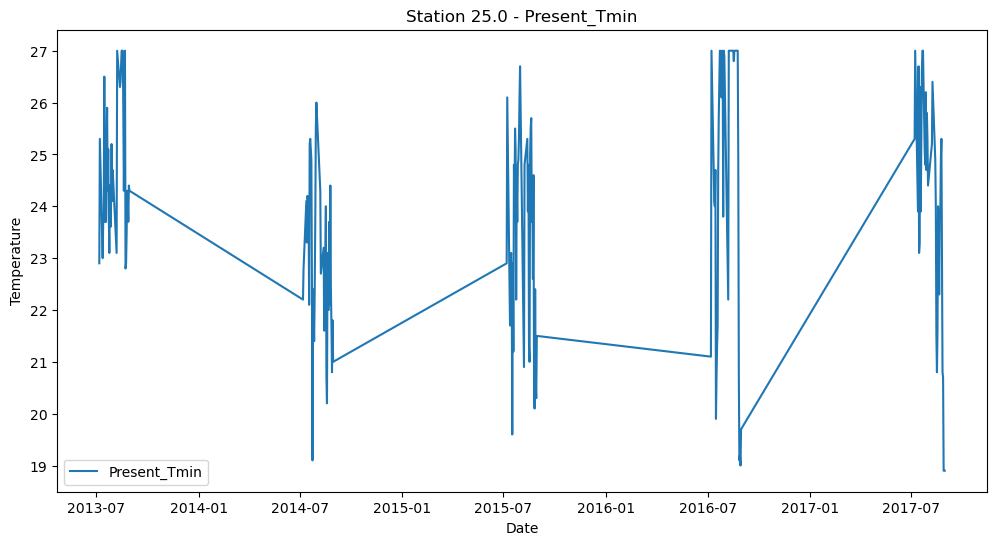

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


for station_id, station_df in df_Tmin.groupby('station'):
    # Check stationarity of 'Present_Tmin'
    result = adfuller(station_df['Present_Tmin'], autolag='AIC')
    
    # Print station ID
    print(f"Station {station_id}:")
    
    # Print ADF test results
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    # Plot 'Present_Tin' for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(station_df.index, station_df['Present_Tmin'], label='Present_Tmin')
    plt.title(f'Station {station_id} - Present_Tmin')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    
    # Print whether the series is stationary or not
    if result[1] <= 0.05:
        print("Stationary (Reject null hypothesis)")
    else:
        print("Not stationary (Fail to reject null hypothesis)")
    
    plt.show()


#### This indicates that the 'Present_Tmin' temperature data for all stations is stationary also .

#### We have 25 stations, for now we will work on first 5.

## Let's start with Tmax.

We will divide the stationary temperature data into 25 separate dataframes, each corresponding to a different weather station, for both maximum temperature (df_Tmax) and minimum temperature (df_Tmin). This allows for individualized analysis and forecasting for each weather station's temperature records, enhancing the granularity of insights and predictions.

**The Data frame represents the maximum temperature (Present_Tmax) records for the first weather station**

In [49]:
S1_max = df_Tmax[df_Tmax['station'] == 1.0]

In [50]:
S1_max=S1_max.drop(columns=['station'])

In [51]:
S1_max.head()

Present_Tmax
Date                    
2013-07-07          25.9
2013-07-08          29.3
2013-07-13          24.2
2013-07-14          24.2
2013-07-15          25.8

In [52]:
S1_max.nunique()

Present_Tmax    67
dtype: int64

**The Data frame represents the maximum temperature (Present_Tmax) records for the second weather station**

In [53]:
S2_max = df_Tmax[df_Tmax['station'] == 2.0]

In [54]:
S2_max=S2_max.drop(columns=['station'])

In [55]:
S2_max.head()

Present_Tmax
Date                    
2013-07-07          28.5
2013-07-08          31.7
2013-07-13          25.2
2013-07-14          25.5
2013-07-15          28.1

In [56]:
S2_max.nunique()

Present_Tmax    81
dtype: int64

**The Data frame represents the maximum temperature (Present_Tmax) records for the third weather station**

In [57]:
S3_max = df_Tmax[df_Tmax['station'] == 3.0]

In [58]:
S3_max=S3_max.drop(columns=['station'])

In [59]:
S3_max.head()

Present_Tmax
Date                    
2013-07-07          28.5
2013-07-08          32.2
2013-07-13          25.3
2013-07-14          25.4
2013-07-15          28.9

In [60]:
S3_max.nunique()

Present_Tmax    83
dtype: int64

**The Data frame represents the maximum temperature (Present_Tmax) records for the fourth weather station**

In [61]:
S4_max = df_Tmax[df_Tmax['station'] == 4.0]

In [62]:
S4_max=S4_max.drop(columns=['station'])

In [63]:
S4_max.head()

Present_Tmax
Date                    
2013-07-07          28.7
2013-07-08          32.6
2013-07-13          26.0
2013-07-14          25.7
2013-07-15          29.3

In [64]:
S4_max.nunique()

Present_Tmax    80
dtype: int64

**The Data frame represents the maximum temperature (Present_Tmax) records for the fifth weather station**

In [65]:
S5_max = df_Tmax[df_Tmax['station'] == 5.0]

In [66]:
S5_max=S5_max.drop(columns=['station'])

In [67]:
S5_max.head()

Present_Tmax
Date                    
2013-07-07          30.8
2013-07-08          31.8
2013-07-13          25.9
2013-07-14          26.0
2013-07-15          26.2

In [68]:
S5_max.nunique()

Present_Tmax    86
dtype: int64

## Now let's continue with Tmin.

**The Data frame represents the min temperature (Present_Tmin) records for the first weather station**

In [69]:
S1_min = df_Tmin[df_Tmin['station'] == 1.0]

In [70]:
S1_min=S1_min.drop(columns=['station'])

In [71]:
S1_min.head()

Present_Tmin
Date                    
2013-07-07          20.1
2013-07-08          23.2
2013-07-13          20.5
2013-07-14          21.3
2013-07-15          22.1

In [72]:
S1_min.nunique()

Present_Tmin    56
dtype: int64

**The Data frame represents the min temperature (Present_Tmin) records for the second weather station**

In [73]:
S2_min = df_Tmin[df_Tmin['station'] == 2.0]

In [74]:
S2_min=S2_min.drop(columns=['station'])

In [75]:
S2_min.head()

Present_Tmin
Date                    
2013-07-07          20.9
2013-07-08          23.3
2013-07-13          22.2
2013-07-14          23.3
2013-07-15          23.3

In [76]:
S2_min.nunique()

Present_Tmin    69
dtype: int64

**The Data frame represents the min temperature (Present_Tmin) records for the third weather station**

In [77]:
S3_min = df_Tmin[df_Tmin['station'] == 3.0]

In [78]:
S3_min=S3_min.drop(columns=['station'])

In [79]:
S3_min.head()

Present_Tmin
Date                    
2013-07-07          23.0
2013-07-08          24.4
2013-07-13          22.5
2013-07-14          23.0
2013-07-15          23.4

In [80]:
S3_min.nunique()

Present_Tmin    70
dtype: int64

**The Data frame represents the min temperature (Present_Tmin) records for the fourth weather station**

In [81]:
S4_min = df_Tmin[df_Tmin['station'] == 4.0]

In [82]:
S4_min=S4_min.drop(columns=['station'])

In [83]:
S4_min.head()

Present_Tmin
Date                    
2013-07-07          22.6
2013-07-08          24.7
2013-07-13          22.3
2013-07-14          23.8
2013-07-15          23.7

In [84]:
S4_min.nunique()

Present_Tmin    73
dtype: int64

**The Data frame represents the min temperature (Present_Tmin) records for the fifth weather station**

In [85]:
S5_min = df_Tmin[df_Tmin['station'] == 5.0]

In [86]:
S5_min=S5_min.drop(columns=['station'])

In [87]:
S5_min.nunique()

Present_Tmin    74
dtype: int64

## **For now we will work on the first station:**

### S1_max & S1_min

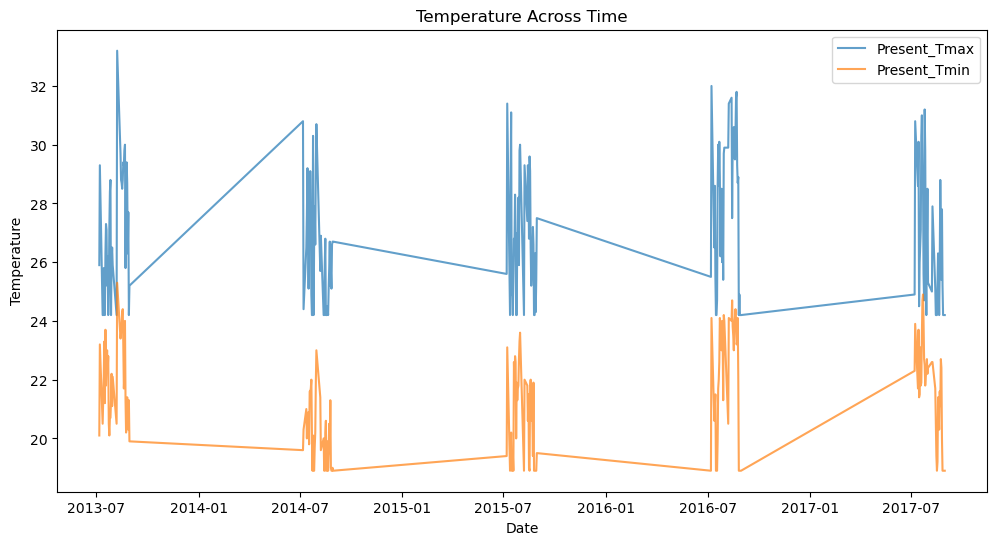

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(S1_max.index, S1_max['Present_Tmax'], label='Present_Tmax', alpha=0.7)
plt.plot(S1_min.index, S1_min['Present_Tmin'], label='Present_Tmin', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Across Time')
plt.legend()
plt.show()


#### It seems that the temperature follows mostly the same pattern yearly.

### **Time Series Decompisition.**

#### **Trend:** This represents the long-term movement or direction of the data. It could be upward, downward, or relatively flat.


#### **Seasonality:** This refers to repeating patterns that occur at fixed intervals, such as daily, monthly, or yearly. For instance, retail sales might have higher values during the holiday season each year.


#### **Cyclical Component:** Unlike seasonality, cyclical variations are not fixed to specific time intervals. They represent longer-term cycles or fluctuations that are not as predictable as seasonal patterns. Economic cycles, which can span several years, are an example of cyclical behavior.

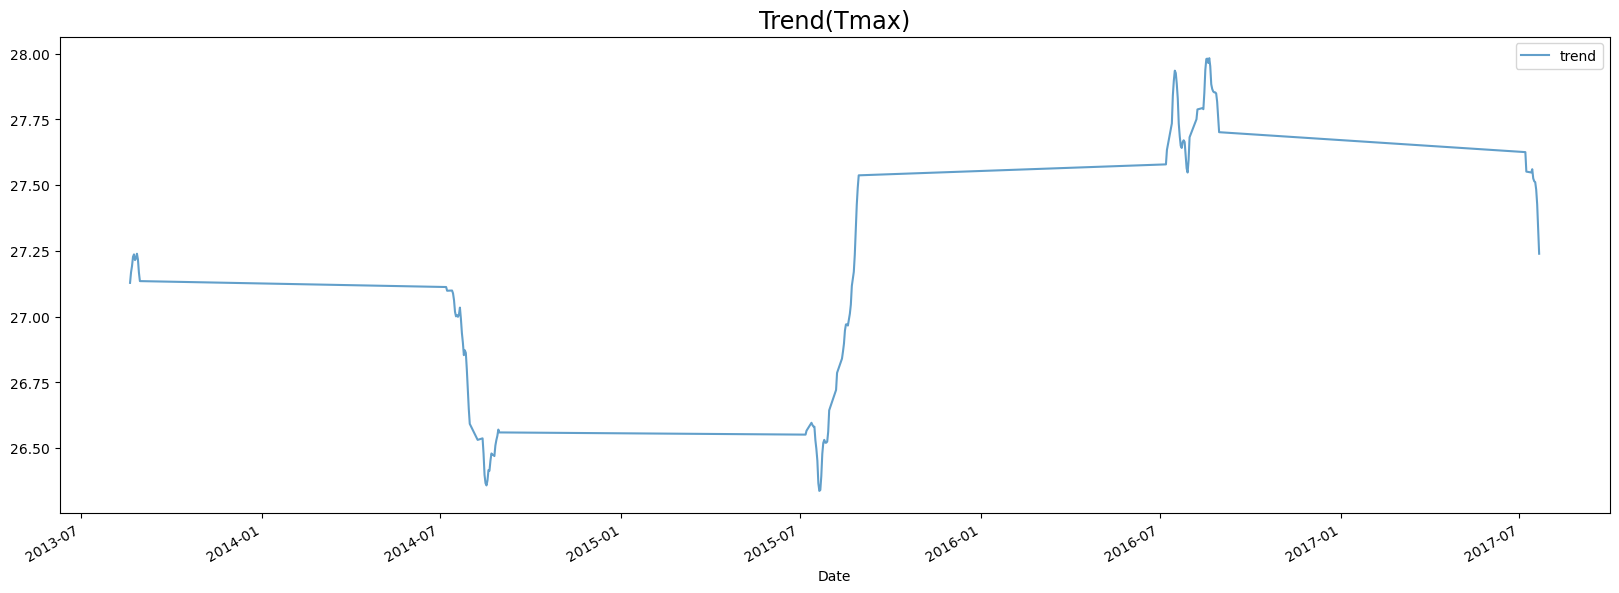

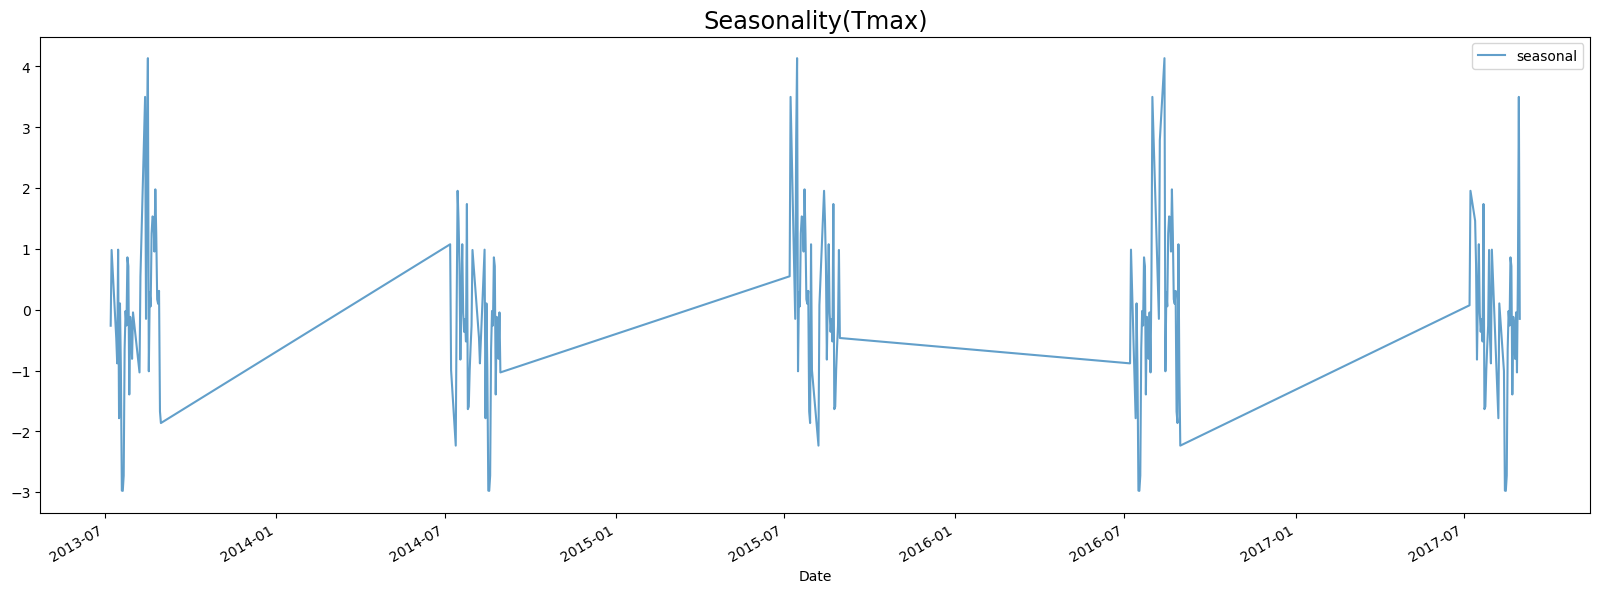

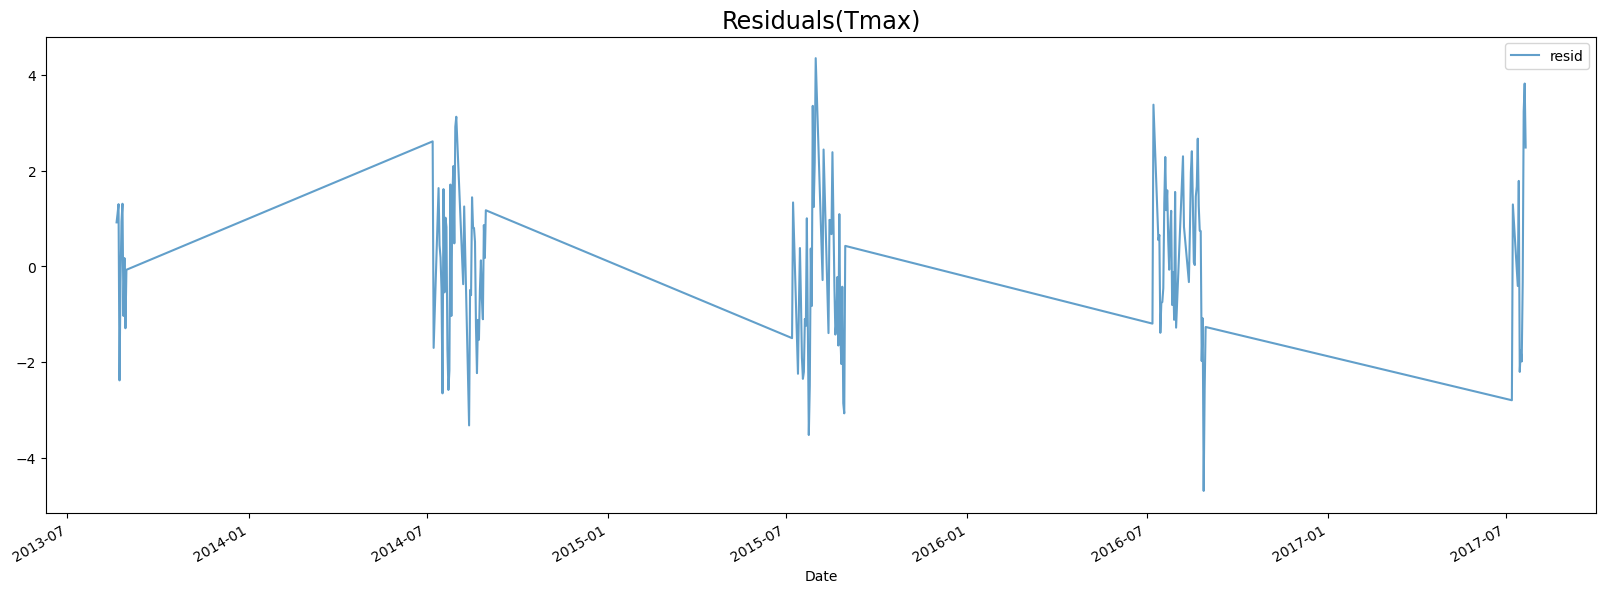

In [89]:
import statsmodels.api as sm


# Decompose the time series
decomposed = sm.tsa.seasonal_decompose(S1_max['Present_Tmax'], model='additive', period=60)

def decomposed_graphs(decomposed_data, title):
    decomposed_data.plot(
        figsize=(20, 7),
        legend=True,
        alpha=0.7,
    )
    plt.title(f'{title}', fontsize="xx-large")
    plt.show()

decomposed_graphs(decomposed.trend, "Trend(Tmax)")
decomposed_graphs(decomposed.seasonal, "Seasonality(Tmax)")
decomposed_graphs(decomposed.resid, "Residuals(Tmax)")


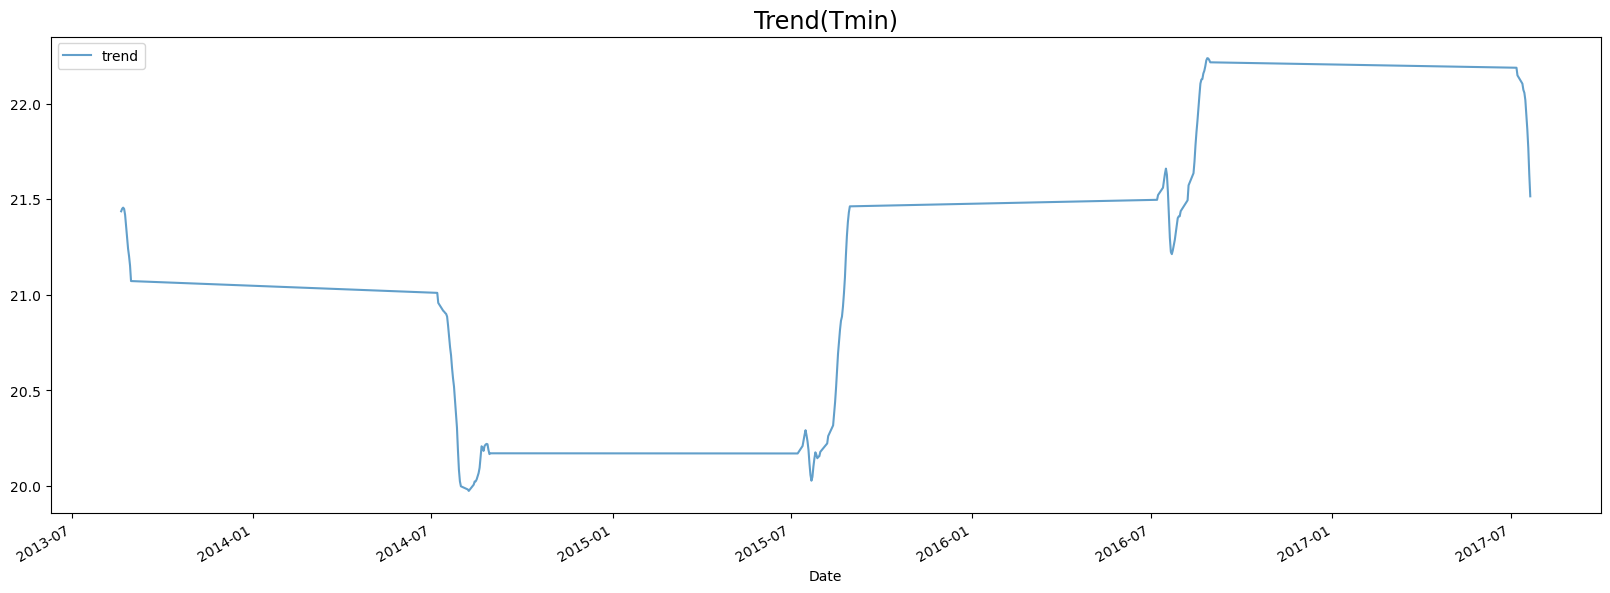

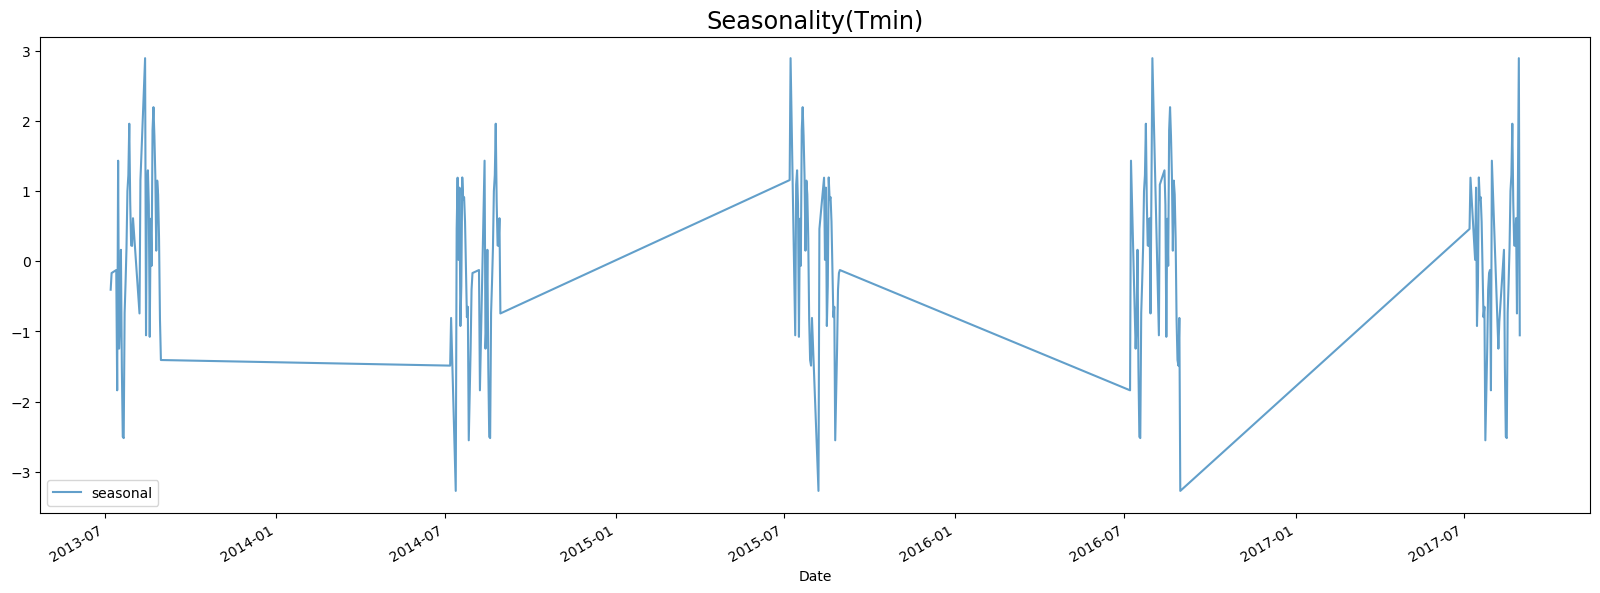

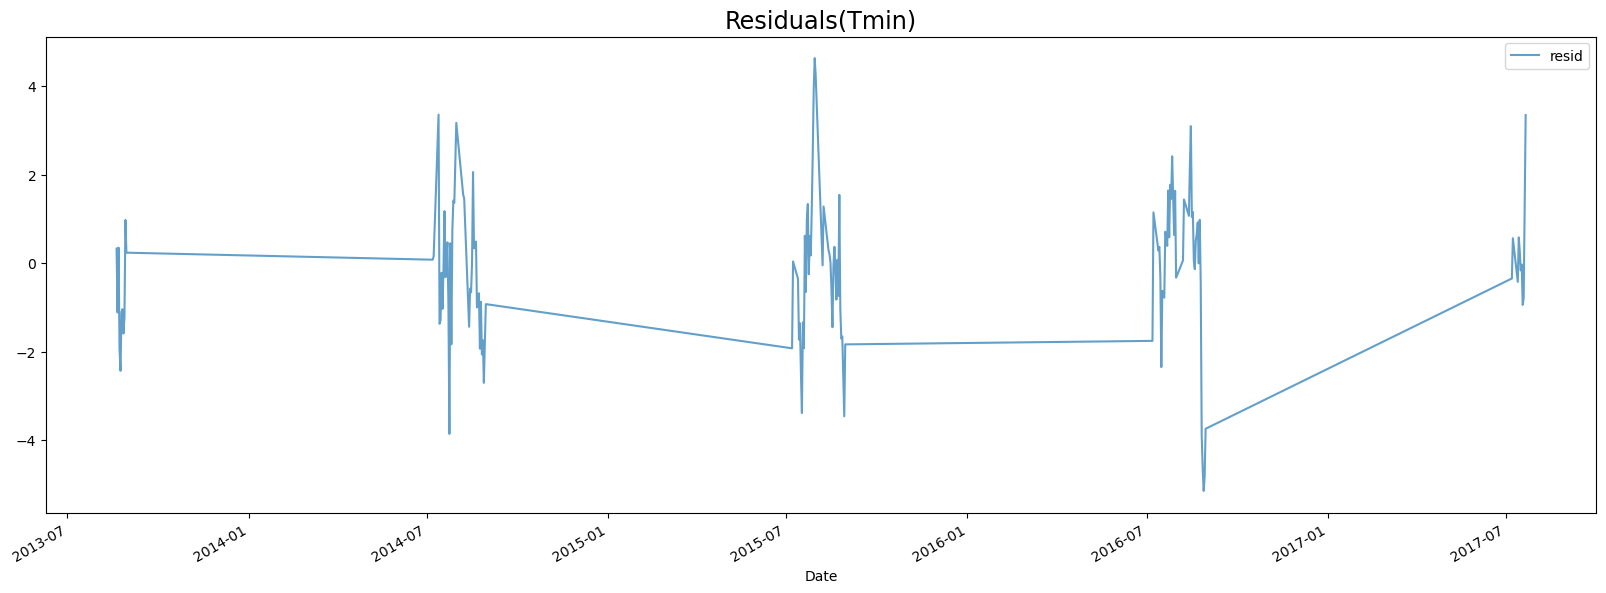

In [141]:

decomposed = sm.tsa.seasonal_decompose(S1_min['Present_Tmin'], model='additive', period=60)

def decomposed_graphs(decomposed_data, title):
    decomposed_data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    
    plt.show()

decomposed_graphs(decomposed.trend, "Trend(Tmin)")
decomposed_graphs(decomposed.seasonal, "Seasonality(Tmin)")
decomposed_graphs(decomposed.resid, "Residuals(Tmin)")


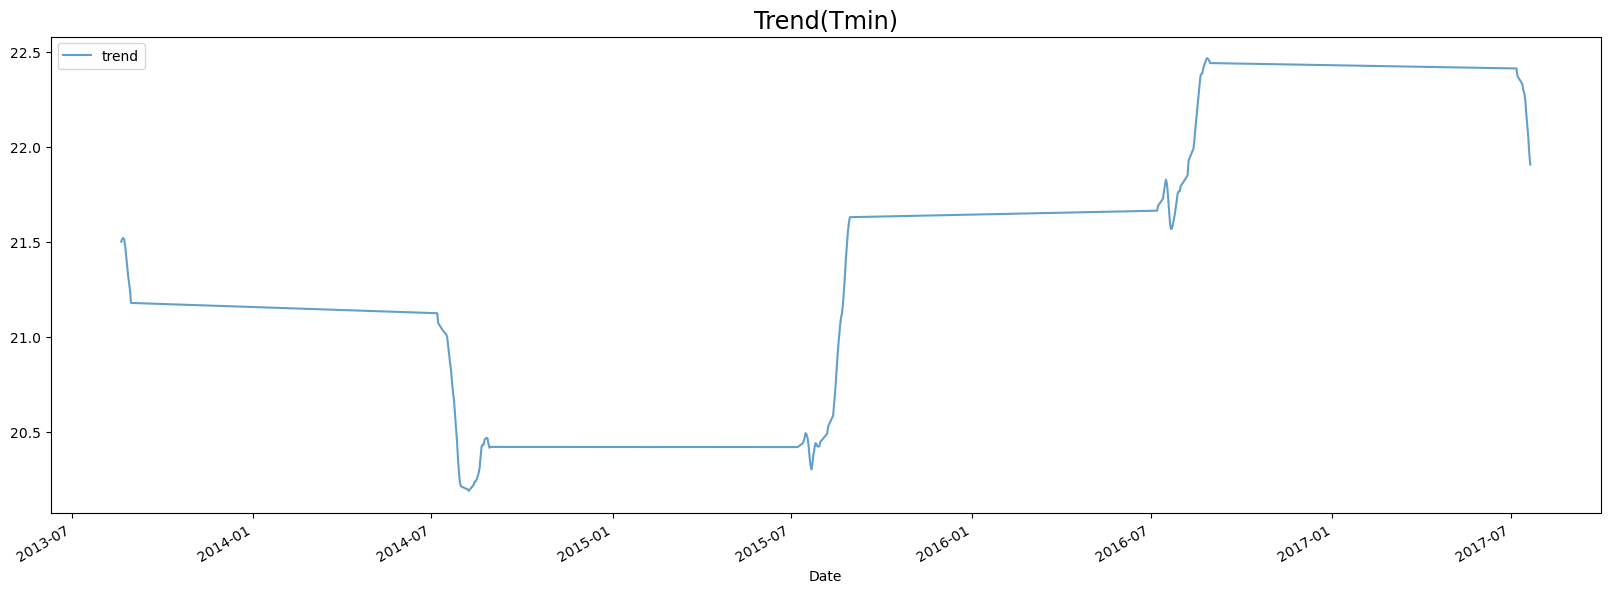

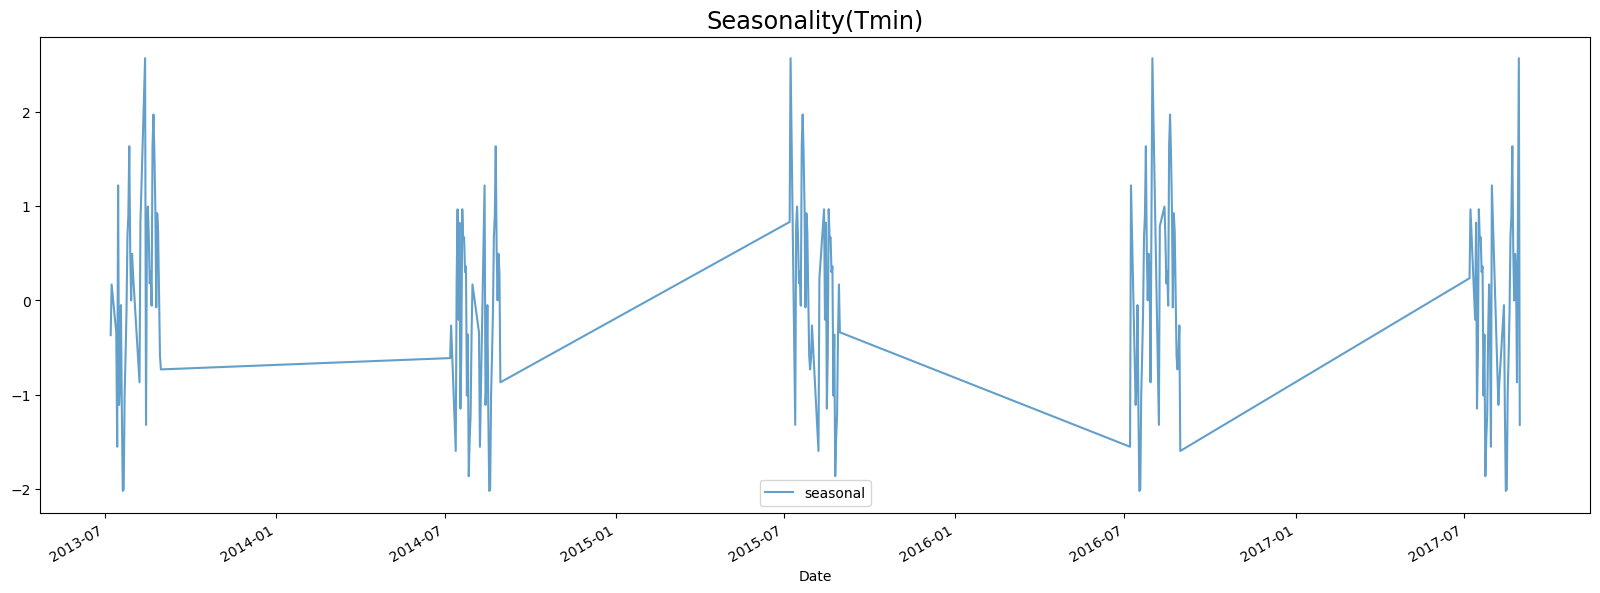

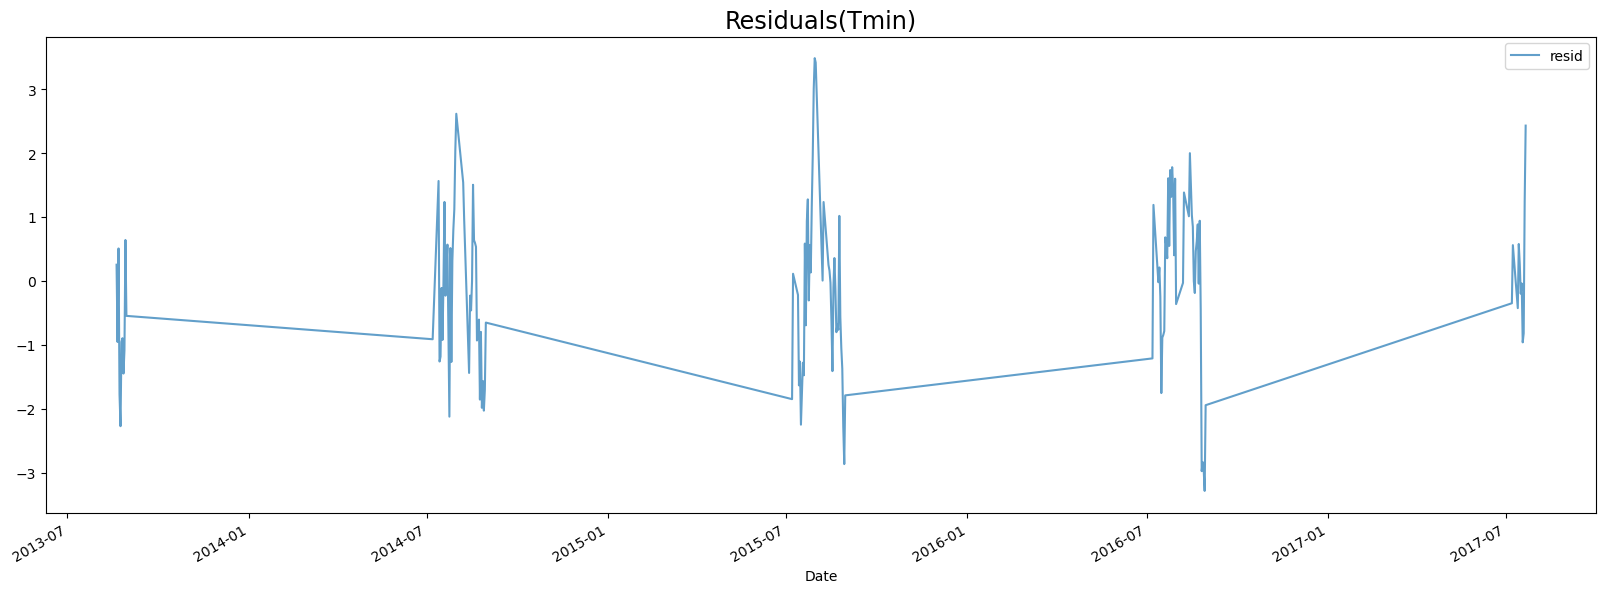

In [90]:

decomposed = sm.tsa.seasonal_decompose(S1_min['Present_Tmin'], model='additive', period=60)

def decomposed_graphs(decomposed_data, title):
    decomposed_data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    
    plt.show()

decomposed_graphs(decomposed.trend, "Trend(Tmin)")
decomposed_graphs(decomposed.seasonal, "Seasonality(Tmin)")
decomposed_graphs(decomposed.resid, "Residuals(Tmin)")


### **Insights**

#### Over the years, the data exhibits noticeable trends. In 2013, temperatures remained relatively stable, with minimal fluctuations. The subsequent years, 2014 and 2015, experienced a cooling trend, while 2016 saw a warming trend. In 2017, temperatures returned to a pattern reminiscent of 2013, although with slight variations. Also, we can understand the consistent cyclic patterns of temperature variations over the years, with the exception of 2014, which displayed smaller seasonal temperature fluctuations. These patterns reflect the regularity of seasonal temperature changes and have implications for seasonal planning and climate analysis.


